# PreProcess

In [1]:
import os
import string
import pandas as pd
from collections import Counter

In [2]:
def preprocess_text(text):
    # Remove colon from the end of the first line if present
    lines = text.split('\n')
    if lines[0].endswith(':'):
        lines[0] = lines[0][:-1]
    text = '\n'.join(lines)
    
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    return text

def count_word_frequency(text):
    words = text.split()
    return Counter(words)

In [7]:
def ensure_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [51]:
def process_stories(base_dir, output_dir):
    for author in os.listdir(base_dir):
        author_dir = os.path.join(base_dir, author)
        author_output_dir = os.path.join(output_dir, author)
        ensure_directory(author_output_dir)  # Ensure author directory exists in output

        if os.path.isdir(author_dir):
            for topic in os.listdir(author_dir):
                topic_dir = os.path.join(author_dir, topic)
                topic_output_dir = os.path.join(author_output_dir, topic)
                ensure_directory(topic_output_dir)  # Ensure topic directory exists in output

                word_count_dir = os.path.join(topic_output_dir, 'word_count')
                ensure_directory(word_count_dir)  # Ensure word count directory exists

                if os.path.isdir(topic_dir):
                    for filename in os.listdir(topic_dir):
                        file_path = os.path.join(topic_dir, filename)
                        with open(file_path, 'r', encoding='utf-8') as file:
                            text = file.read()
                        
                        cleaned_text = preprocess_text(text)
                        word_freq = count_word_frequency(cleaned_text)
                        
                        # Add author name to the filename
                        clean_filename = f"{author}_{filename.replace('.txt', '_cleaned.txt')}"
                        clean_file_path = os.path.join(topic_output_dir, clean_filename)
                        csv_filename = f"{author}_{filename.replace('.txt', '_frequency.csv')}"
                        csv_file_path = os.path.join(word_count_dir, csv_filename)
                        
                        with open(clean_file_path, 'w', encoding='utf-8') as clean_file:
                            clean_file.write(cleaned_text)
                        
                        df = pd.DataFrame(list(word_freq.items()), columns=['element', 'frequency_in_document'])
                        df['document'] = csv_filename 
                        df.to_csv(csv_file_path, index=False)
                        print(f"Processed and saved: {csv_file_path}")

In [52]:
base_dir = r'C:\Users\roial\Documents\Study-2023\LPA-Study2\Output\Batch1-2'
output_dir = r'C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors'
process_stories(base_dir, output_dir)

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_1_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_10_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_11_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Pokemon_Stories\word_count\gemma-2b-it-q8_0.gguf_pokemon_story_7_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Pokemon_Stories\word_count\gemma-2b-it-q8_0.gguf_pokemon_story_8_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Pokemon_Stories\word_count\gemma-2b-it-q8_0.gguf_pokemon_story_9_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Twilight_Stories\word_count\gemma-2b-it-q8_0.gguf_twilight_story_1_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Twilight_Stories\word_count\gemma-2b-it-q8_0.gguf_twilight_story_10_frequency.csv
Proce

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Warcraft_Stories\word_count\gemma-2b-it-q8_0.gguf_warcraft_story_6_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Warcraft_Stories\word_count\gemma-2b-it-q8_0.gguf_warcraft_story_7_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Warcraft_Stories\word_count\gemma-2b-it-q8_0.gguf_warcraft_story_8_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Warcraft_Stories\word_count\gemma-2b-it-q8_0.gguf_warcraft_story_9_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Harry_Potter_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_Har

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\LoTR_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_lotr_story_24_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\LoTR_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_lotr_story_25_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\LoTR_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_lotr_story_26_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\LoTR_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_lotr_story_27_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\L

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_15_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Her

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_4_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_5_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_6_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_7_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_24_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_25_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_26_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_27_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twilight_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_twilight_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twilight_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_twilight_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twilight_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_twilight_story_15_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twilight_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_twilight_story_16_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twili

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_1_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_10_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_11_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\H

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_11_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Twilight_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_twilight_story_8_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Twilight_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_twilight_story_9_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_warcraft_story_1_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_warcraft_story_10_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\LoTR_Stories\word_count\phi-2.Q4_K_S.gguf_lotr_story_11_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\LoTR_Stories\word_count\phi-2.Q4_K_S.gguf_lotr_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\LoTR_Stories\word_count\phi-2.Q4_K_S.gguf_lotr_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\LoTR_Stories\word_count\phi-2.Q4_K_S.gguf_lotr_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\LoTR_Stories\word_count\phi-2.Q4_K_S.gguf_lotr_story_15_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Datase

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_15_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_16_frequency.csv
Processed and saved: C:\Users\roial

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_11_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_H

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_7_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_8_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_9_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Pokemon_Stories\word_count\Qwen1.5-7B-Chat-GGUF_pokemon_story_1_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Pokemon_Stories\word_count\Qwen1.5-7B-Chat-GGUF_pokemon_story_10_frequency.csv
Processed and saved: C:\Users\roial\D

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Twilight_Stories\word_count\Qwen1.5-7B-Chat-GGUF_twilight_story_23_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Twilight_Stories\word_count\Qwen1.5-7B-Chat-GGUF_twilight_story_24_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Twilight_Stories\word_count\Qwen1.5-7B-Chat-GGUF_twilight_story_25_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Twilight_Stories\word_count\Qwen1.5-7B-Chat-GGUF_twilight_story_26_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Twilight_Stories\word_count\Qwen1.5-7B-Chat-GGUF_twilight_story_27_frequency.csv
Proce

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Harry_Potter_Stories\word_count\WizardLM-2-7B-GGUF_Harry_Potter_story_19_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Harry_Potter_Stories\word_count\WizardLM-2-7B-GGUF_Harry_Potter_story_2_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Harry_Potter_Stories\word_count\WizardLM-2-7B-GGUF_Harry_Potter_story_20_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Harry_Potter_Stories\word_count\WizardLM-2-7B-GGUF_Harry_Potter_story_21_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Harry_Potter_Stories\word_count\WizardLM-2-7B-GGUF_Harry_Potter_story_22_

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_12_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_13_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_14_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_15_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_16_frequency.csv
Processed and saved: C:\Users\roial

Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_29_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_3_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_30_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_4_frequency.csv
Processed and saved: C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_5_frequency.csv
Processed and saved: C:\User

In [53]:
topicDir = r"C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic"

In [54]:
import shutil
def aggregate_topics_across_authors(output_dir, aggregated_output_dir):
    # Create a dictionary to map topics to their respective files across authors
    topic_files = {}
    
    for author in os.listdir(output_dir):
        author_dir = os.path.join(output_dir, author)
        if os.path.isdir(author_dir):
            for topic in os.listdir(author_dir):
                topic_dir = os.path.join(author_dir, topic, 'word_count')
                if os.path.isdir(topic_dir):
                    if topic not in topic_files:
                        topic_files[topic] = []
                    
                    for file in os.listdir(topic_dir):
                        topic_files[topic].append(os.path.join(topic_dir, file))
    
    # Now create the aggregated directory structure and copy files
    for topic, files in topic_files.items():
        topic_aggregate_dir = os.path.join(aggregated_output_dir, topic)
        ensure_directory(topic_aggregate_dir)  # Ensure each topic directory exists in the aggregated output
        
        for file_path in files:
            shutil.copy(file_path, topic_aggregate_dir)
            print(f"Copied {file_path} to {topic_aggregate_dir}")

In [55]:
aggregate_topics_across_authors(output_dir, topicDir)

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_10_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_11_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harry_Potter_Stories\word_count\gemma-2b-it-q8_0.gguf_Harry_Potter_story_12_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Harr

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Harry_Potter_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_Harry_Potter_story_6_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Harry_Potter_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_Harry_Potter_story_7_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Harry_Potter_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_Harry_Potter_story_8_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_3_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_4_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Harry_Potter_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_Harry_Potter_story_5_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_22_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_23_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potter_Stories\word_count\Qwen1.5-7B-Chat-GGUF_Harry_Potter_story_24_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Harry_Potter_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Harry_Potte

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\LoTR_Stories\word_count\gemma-2b-it-q8_0.gguf_lotr_story_18_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\LoTR_Stories\word_count\gemma-2b-it-q8_0.gguf_lotr_story_19_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\LoTR_Stories\word_count\gemma-2b-it-q8_0.gguf_lotr_story_1_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\LoTR_Stories\word_count\gemma-2b-it-q8_0.gguf_lotr_story_20_frequency.csv to 

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_10_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_11_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_lotr_story_12_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\LoTR_Stories\word_co

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\LoTR_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_lotr_story_25_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\LoTR_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_lotr_story_26_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\LoTR_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_lotr_story_27_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\LoTR_Stories\word_count\mixtral_7bx2_moe.

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_18_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_19_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_1_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\LoTR_Stories\word_count\Qwen1.5-7B-Chat-GGUF_lotr_story_20_frequency.csv to C:\Users

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\LoTR_Stories\word_count\WizardLM-2-7B-GGUF_lotr_story_8_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\LoTR_Stories\word_count\WizardLM-2-7B-GGUF_lotr_story_9_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\LoTR_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Pokemon_Stories\word_count\gemma-2b-it-q8_0.gguf_pokemon_story_10_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\gemma-2b-it-q8_0.gguf\Pokemon_Stories\word_count\gemma-2b-it-q8_0.gguf_pokemon_story_11_frequency.csv t

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Pokemon_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_pokemon_story_28_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Pokemon_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_pokemon_story_29_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Pokemon_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_pokemon_story_2_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_18_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_19_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_pokemon_story_1_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Pokemon_Stories

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Pokemon_Stories\word_count\phi-2.Q4_K_S.gguf_pokemon_story_7_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Pokemon_Stories\word_count\phi-2.Q4_K_S.gguf_pokemon_story_8_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Pokemon_Stories\word_count\phi-2.Q4_K_S.gguf_pokemon_story_9_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Pokemon_Stories\word_count\Qwen1.5-7B-Chat-GGUF_pokemon_story_10_frequency.cs

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_26_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_27_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_28_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Pokemon_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Pokemon_Stories\word_count\WizardLM-2-7B-GGUF_pokemon_story_29_frequen

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_19_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_1_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Twilight_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_twilight_story_20_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Meta-Llama-3-8B-Instruct-GGUF\Twilight_Stories\word_count\Meta-Llama-3-8B-Instruct-GGUF_twilight_story_9_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Twilight_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_twilight_story_10_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Twilight_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_twilight_story_11_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_29_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_2_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_30_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\phi-2.Q4_K_S.gguf\Twilight_Stories\word_count\phi-2.Q4_K_S.gguf_twilight_story_3_freque

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_21_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_22_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story_23_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Twilight_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\WizardLM-2-7B-GGUF\Twilight_Stories\word_count\WizardLM-2-7B-GGUF_twilight_story

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_18_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_19_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Hermes-2-Pro-Mistral-7B.Q4_0.gguf\Warcraft_Stories\word_count\Hermes-2-Pro-Mistral-7B.Q4_0.gguf_warcraft_story_1_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_warcraft_story_15_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_warcraft_story_16_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcraft_Stories\word_count\mixtral_7bx2_moe.Q2_K.gguf_warcraft_story_17_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\mixtral_7bx2_moe.Q2_K.gguf\Warcr

Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Warcraft_Stories\word_count\Qwen1.5-7B-Chat-GGUF_warcraft_story_13_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Warcraft_Stories\word_count\Qwen1.5-7B-Chat-GGUF_warcraft_story_14_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Warcraft_Stories\word_count\Qwen1.5-7B-Chat-GGUF_warcraft_story_15_frequency.csv to C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic\Warcraft_Stories
Copied C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors\Qwen1.5-7B-Chat-GGUF\Warcraft_Stories\word_count\Qwen1.5-7B-Chat-GGU

## Run Experiment 

In [80]:
def compute_distance_15052023(df):
    # Extract the second column
    column_values = df.iloc[:, 1]
    # Calculate the absolute values and sum them up
    total_sum = column_values.abs().sum()
    return total_sum
        

In [100]:
from visualize import plot_pca
from LPA import PCA
import os
from LPA import Corpus, sockpuppet_distance , PCA
import pandas as pd
import seaborn as sns
import random
from typing import List

import matplotlib.pyplot as plt


def rename_matrix(df):
    for col in df.columns:
        if col.lower().startswith('write me'):
            df.rename(columns={col: 'prompt'}, inplace=True)
        else:
            df.rename(columns={col: 'real'}, inplace=True)
    for i, index_name in enumerate(df.index):
        if index_name.lower().startswith('write me'):
            df.rename(index={index_name: 'prompt ' + str(i)}, inplace=True)
        else:
            df.rename(index={index_name: 'real ' + str(i)}, inplace=True)
    return df


def calculate_distances(dvr_path, folder, outpath):
    """
    Calculates the Euclidean distances between a reference vector (the global_weight column of df)
    and all other vectors in a folder containing dataframes representing vectors.
    
    Args:
    - df (pd.DataFrame): A pandas DataFrame containing a column named 'global_weight' that will
    be used as the reference vector.
    - folder (str): Path to the folder containing CSV files representing other vectors.
    
    Returns:
    - A pandas DataFrame containing the distances between the reference vector and all other vectors.
    """
    dvr_frame = pd.read_csv(dvr_path, low_memory = False)
    # Create an empty list to hold the distances
    distances = []
    
       # Iterate over all CSV files in the folder
    for file_name in os.listdir(folder):
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Load the CSV file into a pandas DataFrame
            df = pd.read_csv(os.path.join(folder, file_name))
            # Calculate the Euclidean distance between the reference vector and the current vector
            distance = compute_distance_15052023(df)
            # Add the distance to the list
            distances.append(distance)
            
    distances_df = pd.DataFrame(distances, columns=['Distance'], index=os.listdir(folder))
    
    distances_df.to_csv(outpath,mode='w',header=True, index=True)
    return distances_df


def wordfreq_random_files(prompt_folder , num_files=2):
    # Get a list of all files in the prompt folder
    all_files = os.listdir(prompt_folder)
    
    # If the sample size is larger than the number of files, set the sample size to the number of files
    sample_size = min(num_files, len(all_files))
    
    # Select num_files random files from the list
    random_files = random.sample(all_files, sample_size)
    dfs = []

    # Loop through each file in the directory
    for file_name in random_files:
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Read the file into a DataFrame and append it to the list
            file_path = os.path.join(prompt_folder, file_name)
            df = pd.read_csv(file_path)
            dfs.append(df)
    # Concatenate all the DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)
    return df

def export_signatures(dataframes: List[pd.DataFrame] , outputFolder="LPAresults/signitures/" , index=True):
    for df in dataframes:
        filename = df.name + '-Signature.csv'
        df.to_csv(outputFolder+ filename, index=index)
        
def make_dirs_topic(experimentpath ):# Set up directories for the experiment
    os.makedirs(experimentpath , exist_ok=True)
    os.makedirs(experimentpath+"/Images" , exist_ok=True)
    #Signatures Folders
    os.makedirs(experimentpath+"/Signatures" , exist_ok=True)
    #Results Folders
    os.makedirs(experimentpath+"/Results" , exist_ok=True)
        

def run_lpa(freq_folder , out_path , experiment_title, to_spd = False, epsilon_frac = 2):
    out_folder = out_path+"/"+experiment_title
    os.makedirs(out_path+"/"+experiment_title , exist_ok=True)
    make_dirs_topic(out_path+"/"+experiment_title)
    freq = wordfreq_random_files(freq_folder , num_files=4500)
    freq.rename(columns={'origin_index': 'document', 'word': 'element' , 'frequency': 'frequency_in_document'}, inplace=True)
    #Create Corpus
    corpus = Corpus(freq=freq)
    
    #Create DVR
    dvr = corpus.create_dvr()
    dvr_path = out_folder+"/"+experiment_title+"-dvr.csv"
    dvr.to_csv(dvr_path ,mode='w',header=True, index=False)
    #Create Epsilon
    # epsilon_frac = 2 # Change the epsilon to get better results
    epsilon = 1 / (len(dvr) * epsilon_frac)
    #Create Signatures
    signatures = corpus.create_signatures(epsilon=epsilon, sig_length=100, distance="KLDe")
    export_signatures(signatures , outputFolder = out_folder+"/Signatures/")
    all_distances = calculate_distances(dvr_path , out_folder+"/Signatures/" , out_folder+"/Results/all-distances.csv")
    if to_spd:
        spd = sockpuppet_distance(corpus, corpus , res = "matrix" )
        spd.to_csv(out_folder+"/Results/SPD_Matrix.csv",mode='w',header=True, index=True)
        spd_heatmap = rename_matrix(spd)
        fig = plt.figure(figsize=(15, 15))
        heatmap = sns.heatmap(spd_heatmap, cmap='viridis', annot=False ,ax=fig.gca())
        heatmap.figure.savefig(out_folder+"/Images-heatmap.jpg")
        pca, evr = PCA(spd, n_components=2)
        plot_pca(pca,spd.index).save(out_folder+'/Images-pca_plot.html') 


Experiment Per topic

In [86]:
base_dataset = r"C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Per_Topic"

In [87]:
topics = ["Harry_Potter_Stories", "LoTR_Stories", "Pokemon_Stories" ,"Twilight_Stories","Warcraft_Stories"]

In [88]:
for topic in topics:
    run_lpa(base_dataset+"/"+topic ,
            r"C:\Users\roial\Documents\Work\LPA-for-Detection\Experiments\All_models_on a topic_no_spd" ,
            topic+"_Experiment")

With spd

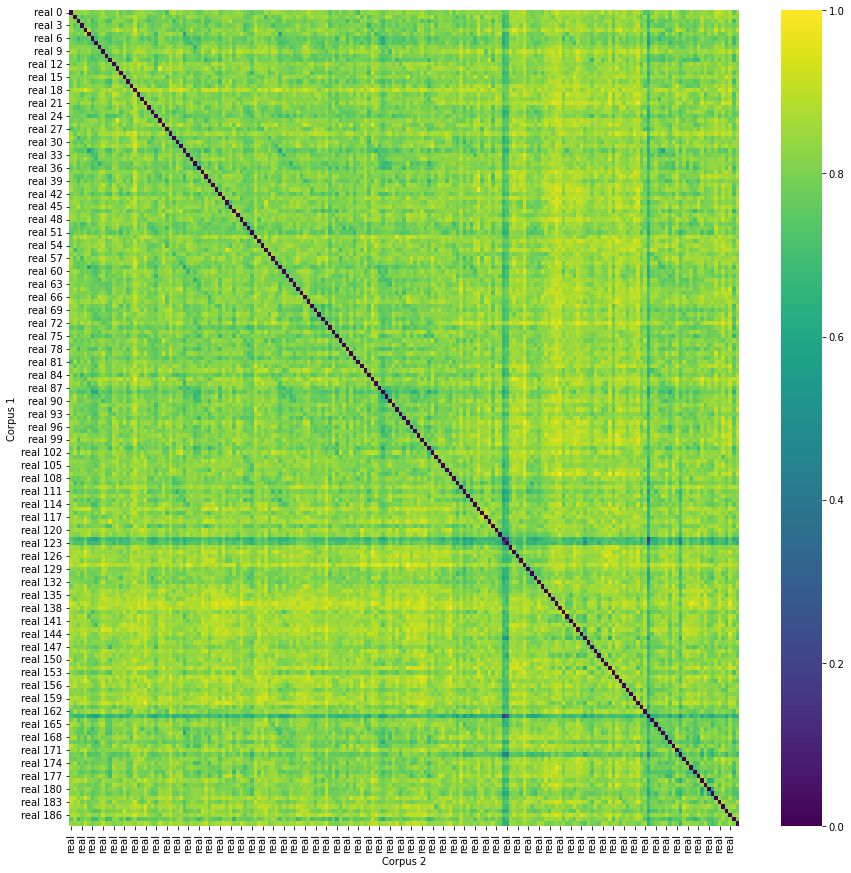

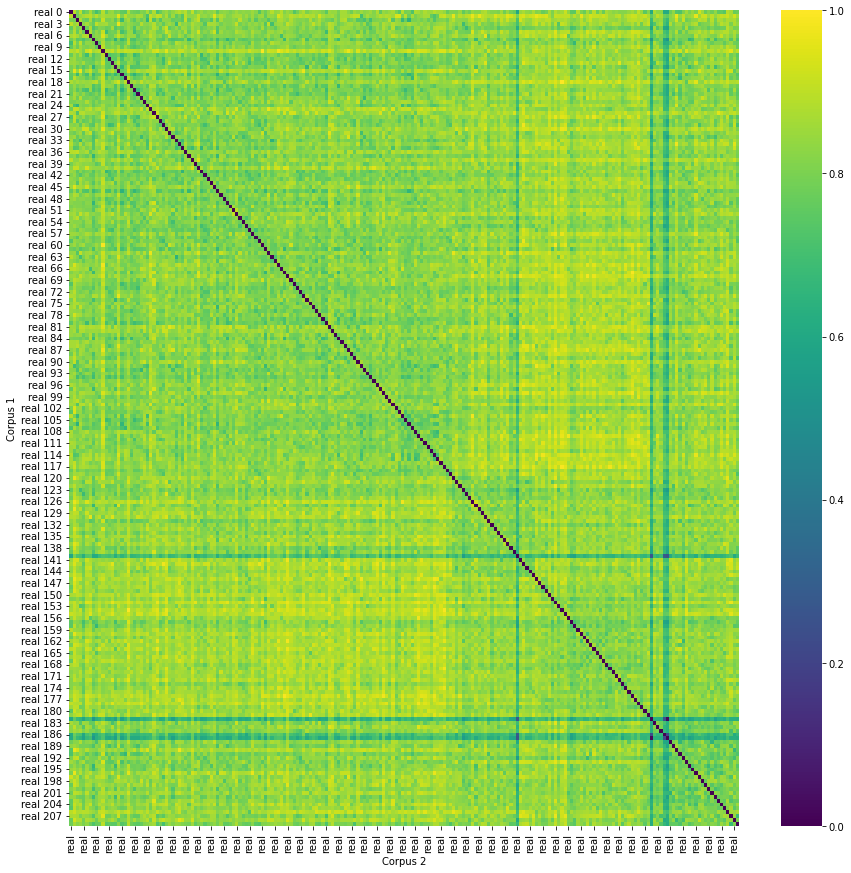

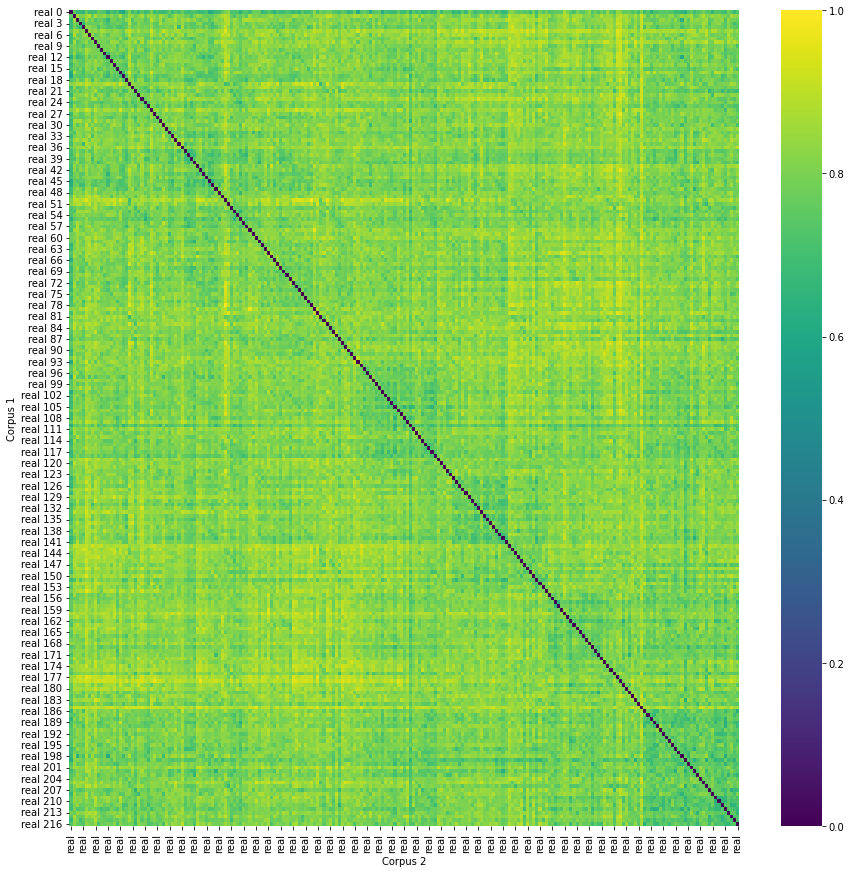

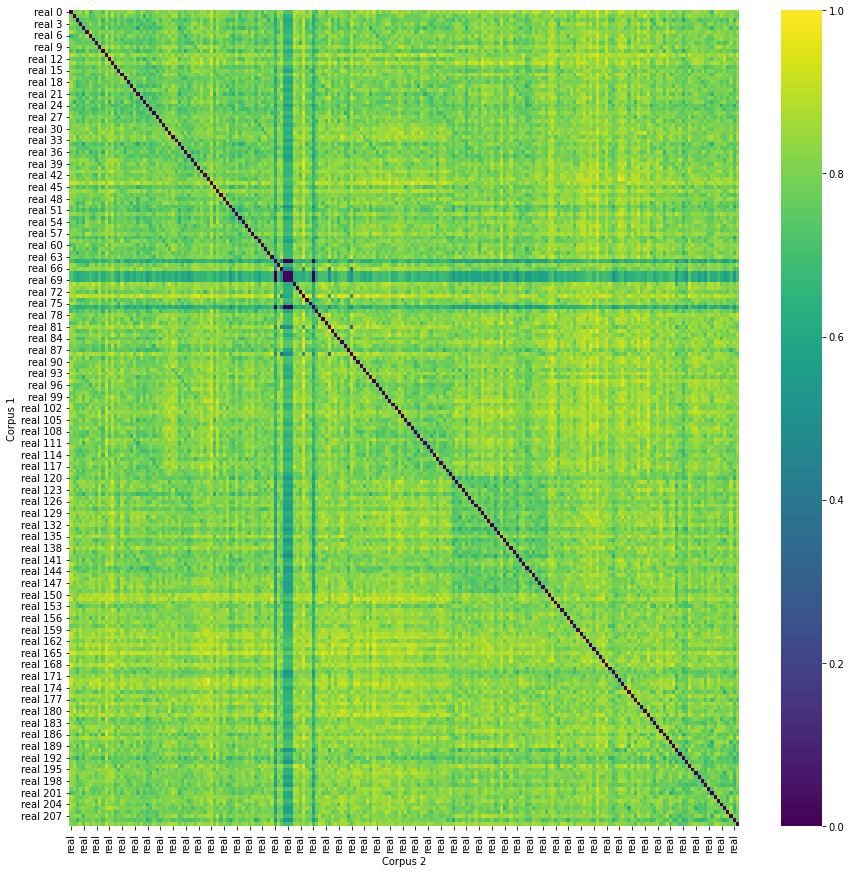

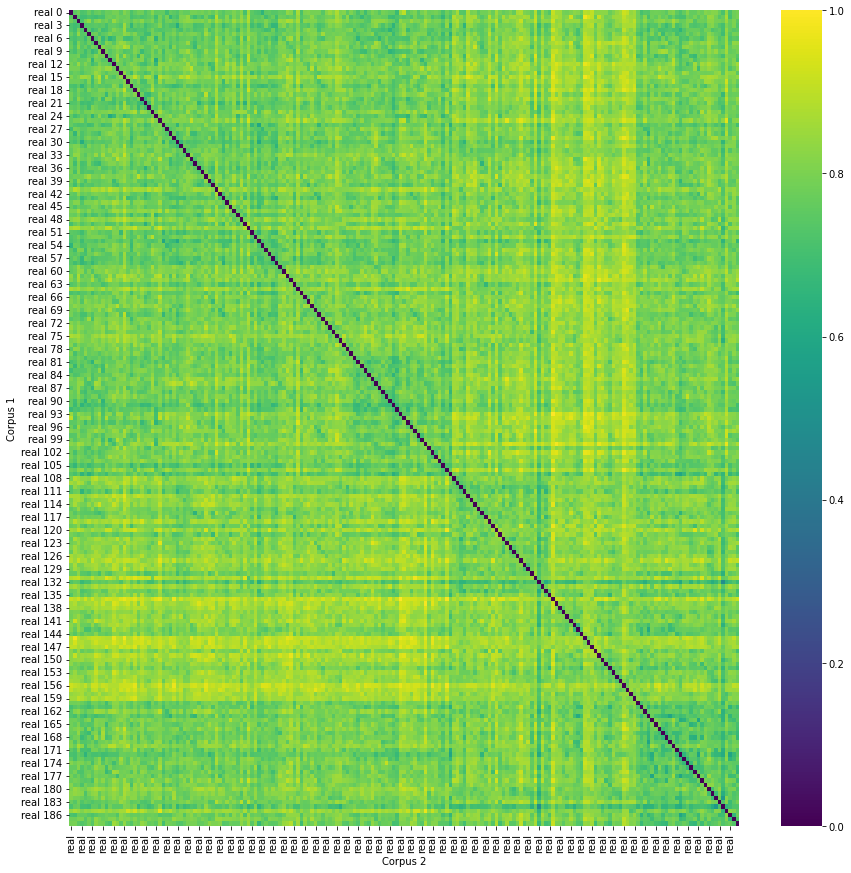

In [101]:
for topic in topics:
    run_lpa(base_dataset+"/"+topic ,
            r"C:\Users\roial\Documents\Work\LPA-for-Detection\Experiments\All_models_on a All_models_on a topic_with_spd" ,
            topic+"_Experiment", to_spd = True)

## Each Model Seperately:

In [90]:
base_folder = r"C:\Users\roial\Documents\Work\LPA-for-Detection\Dataset\LLM-Dataset\Authors"

In [95]:
for folder_name in os.listdir(base_folder):
    for topic in topics:
        run_lpa(base_folder+"/"+folder_name+"/"+topic+"/"+"word_count", 
               r"C:\Users\roial\Documents\Work\LPA-for-Detection\Experiments\Each_model_DVRS_no_spd",
               folder_name+"-"+topic)


C:\Users\roial\AppData\Local\Temp/ipykernel_12616/3906682260.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 15))


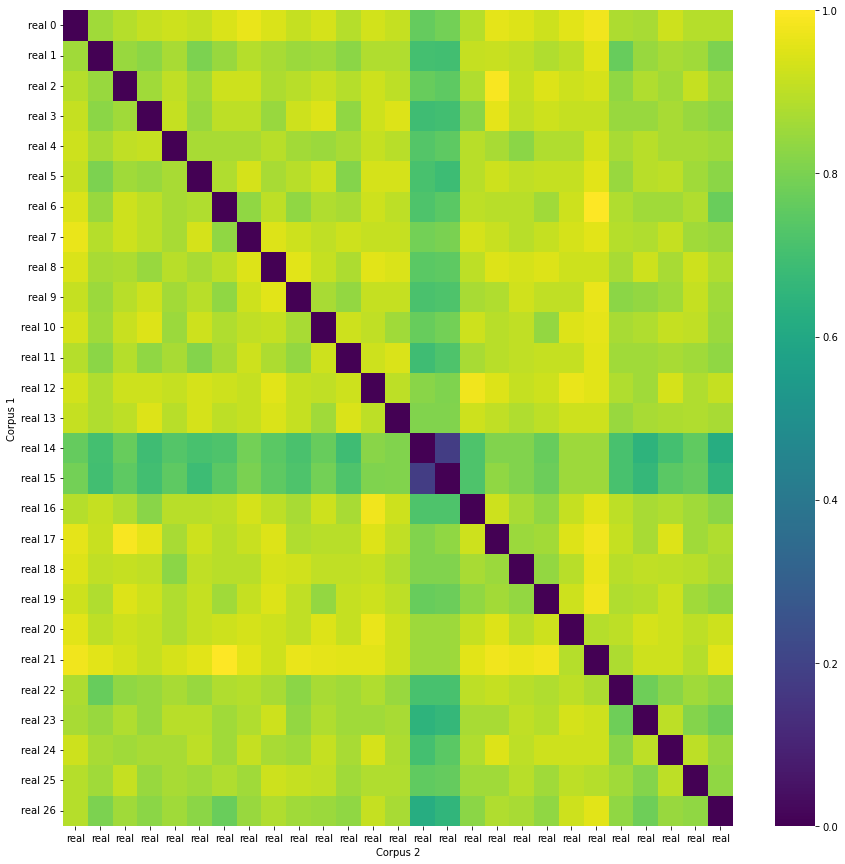

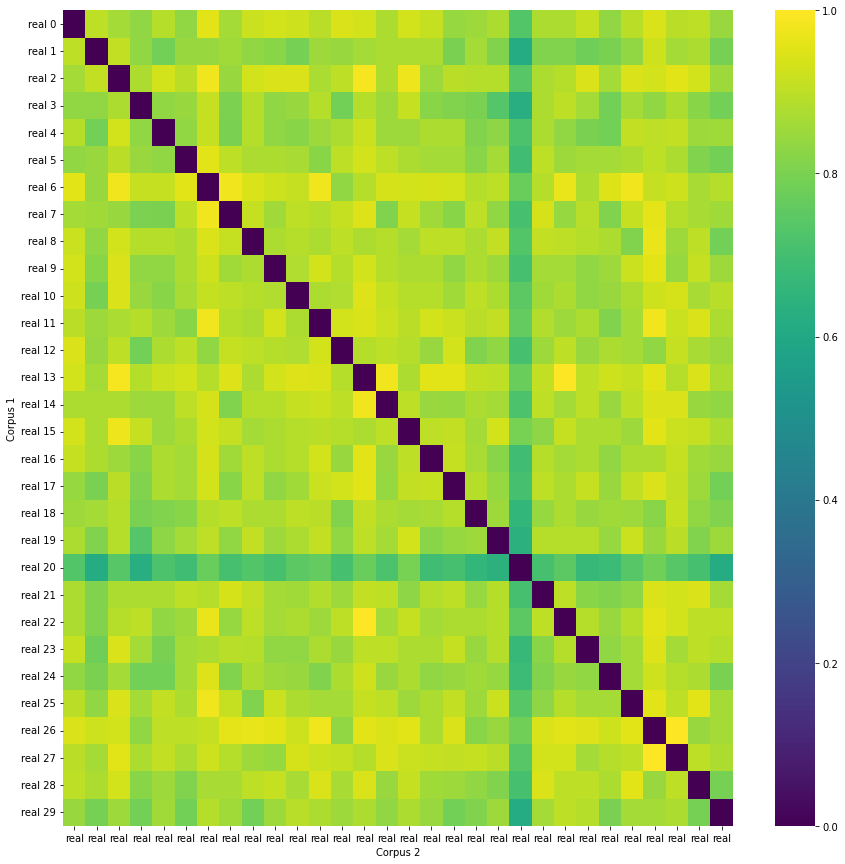

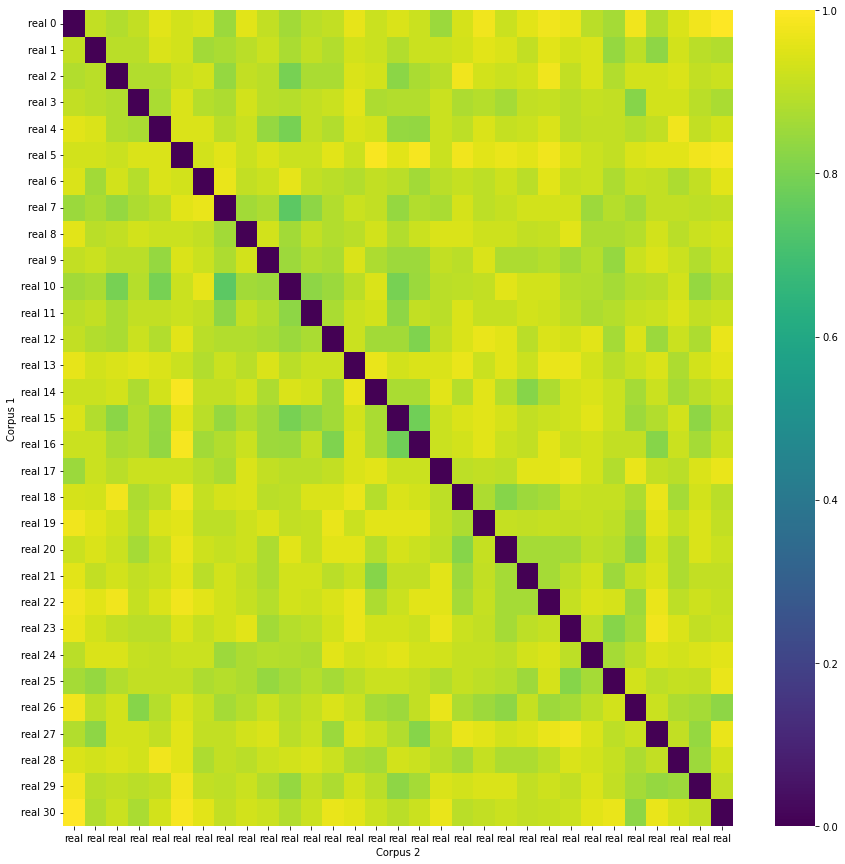

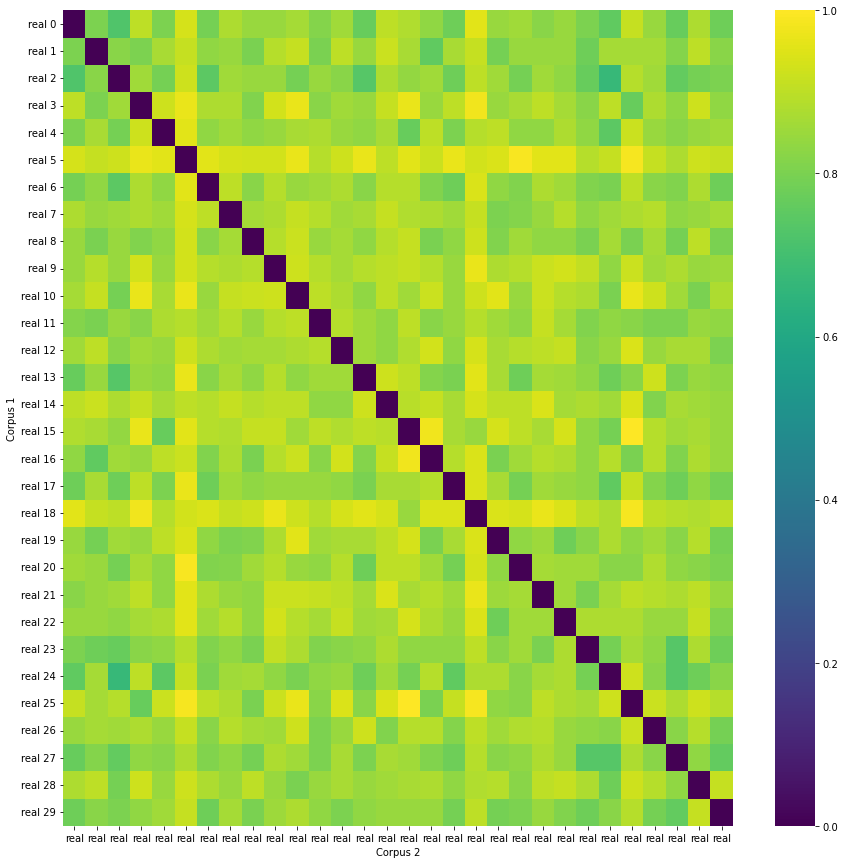

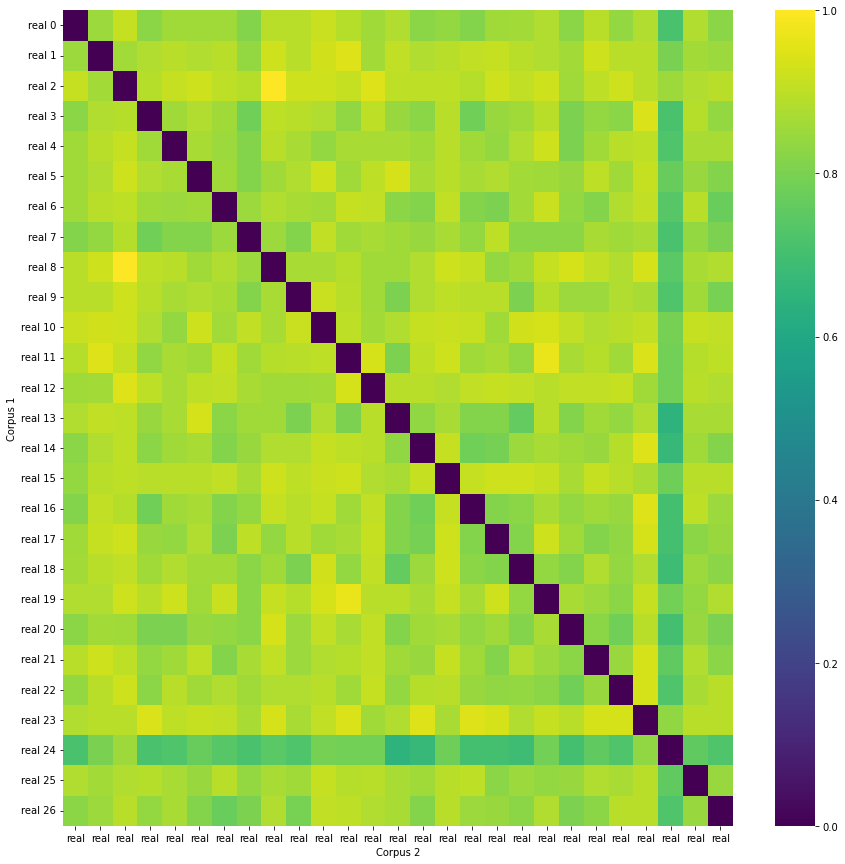

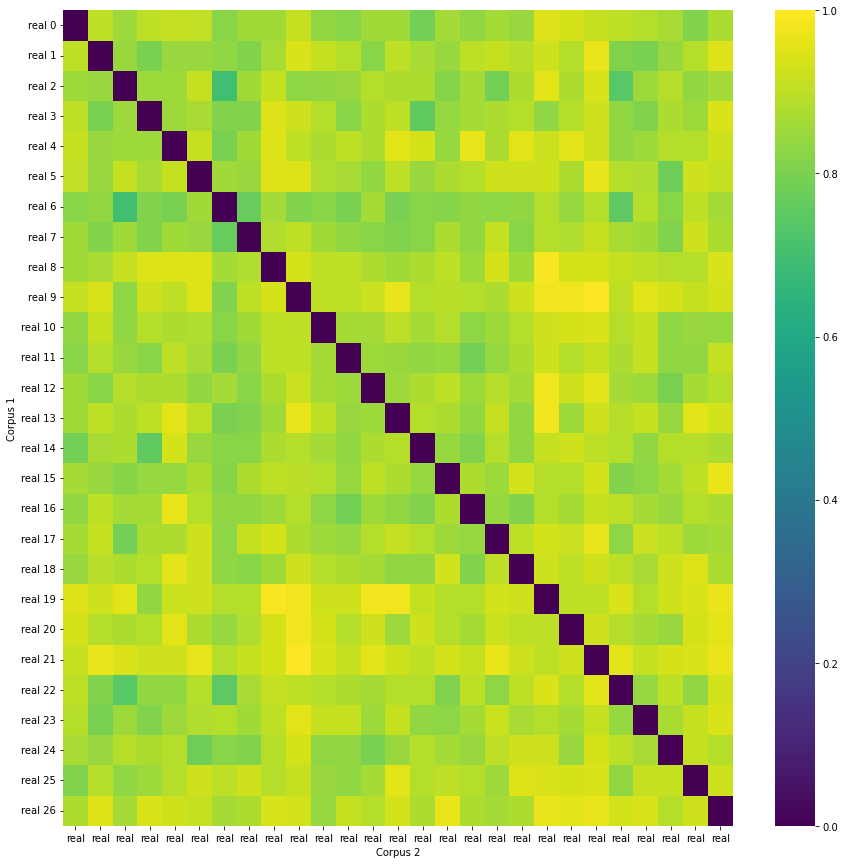

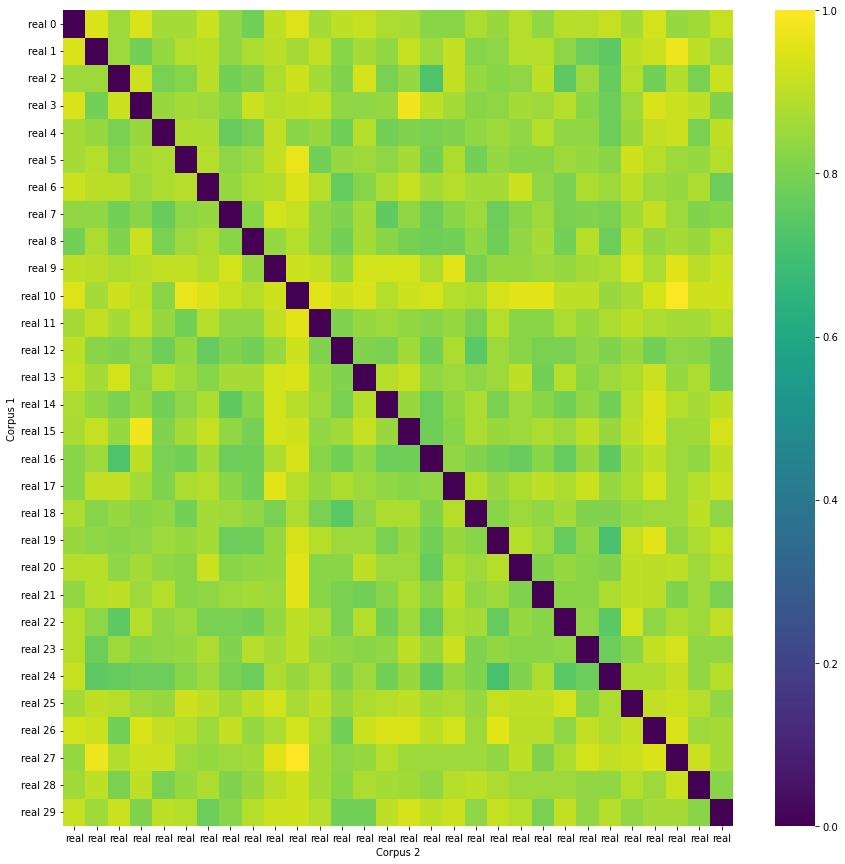

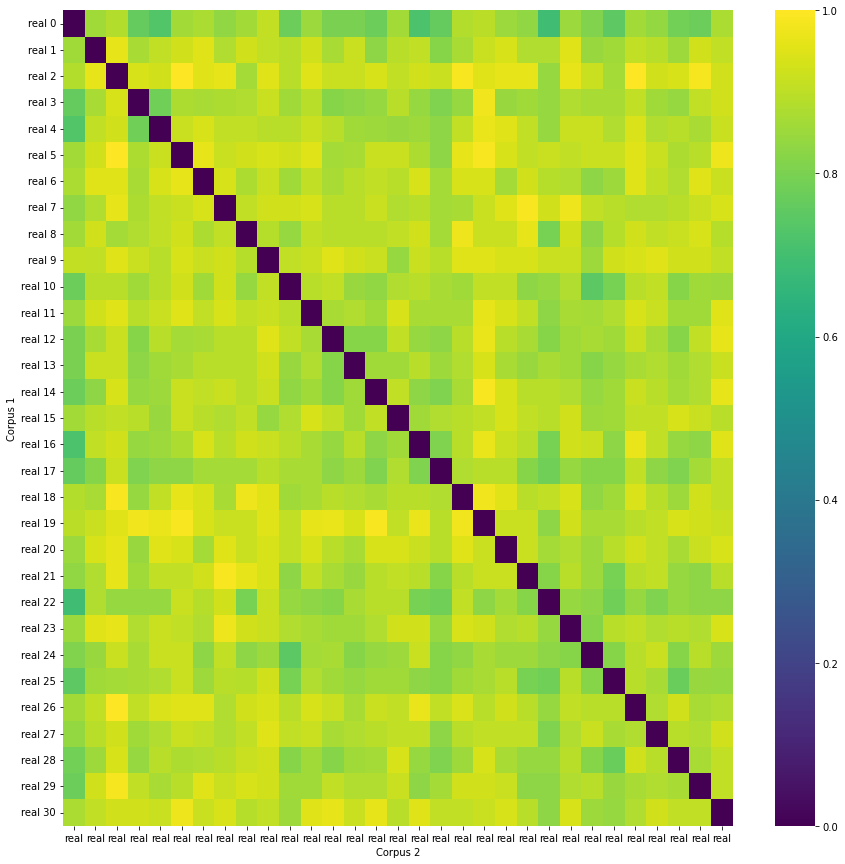

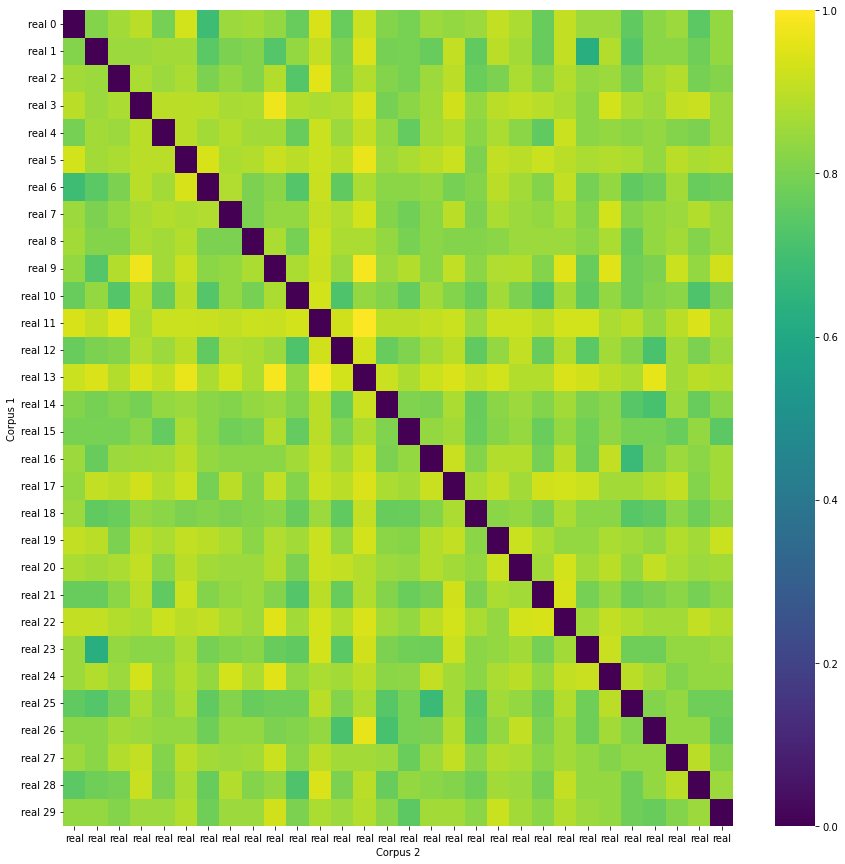

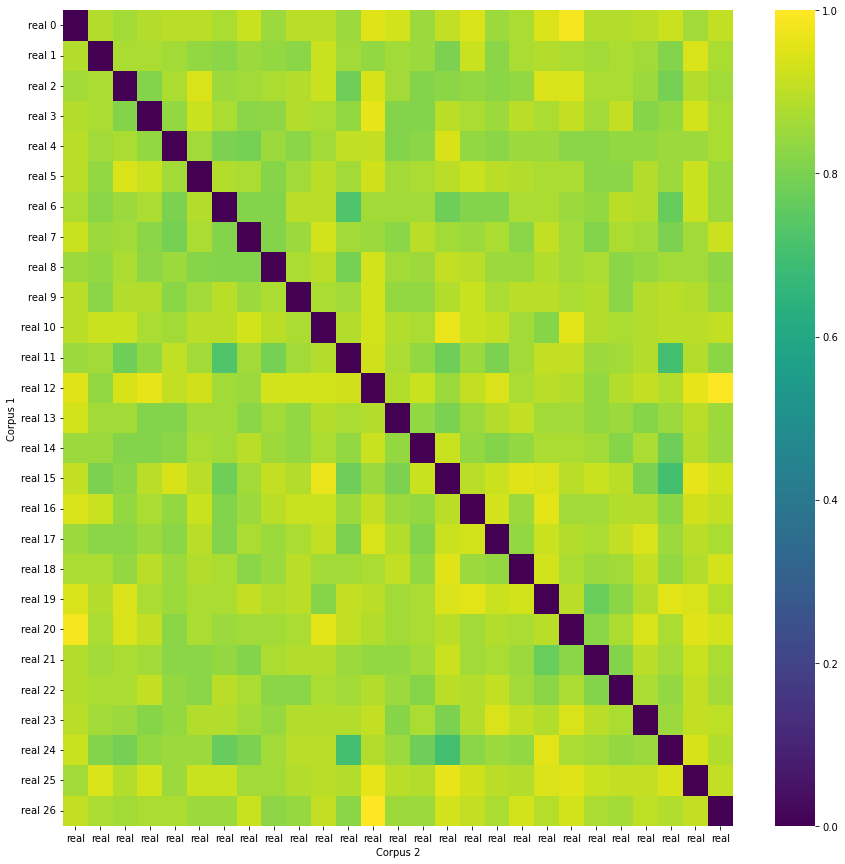

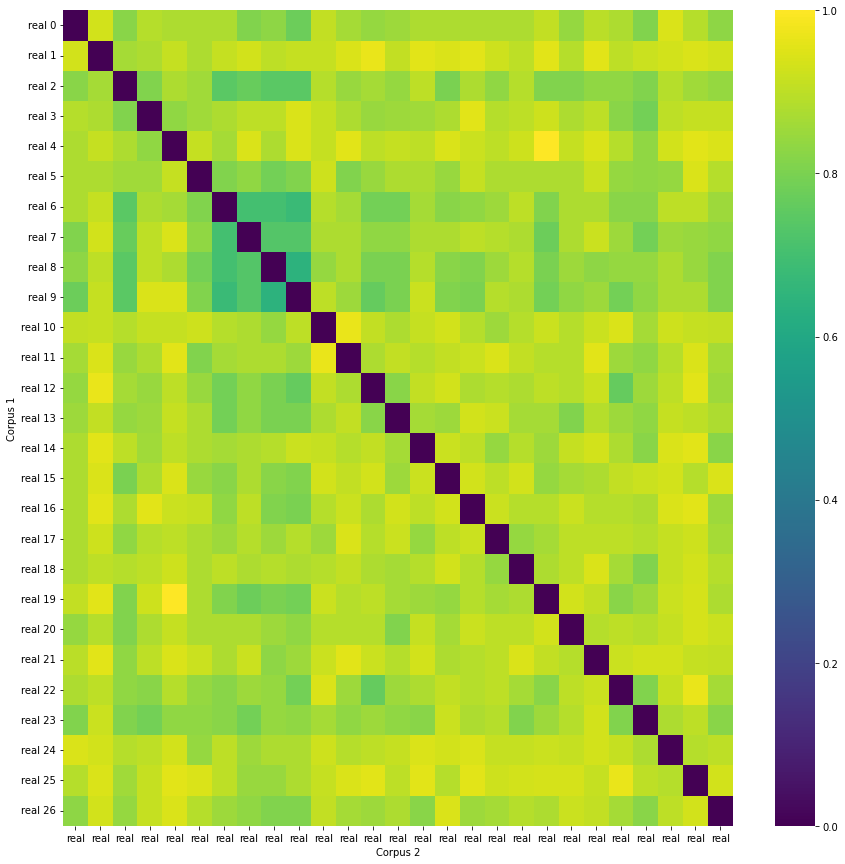

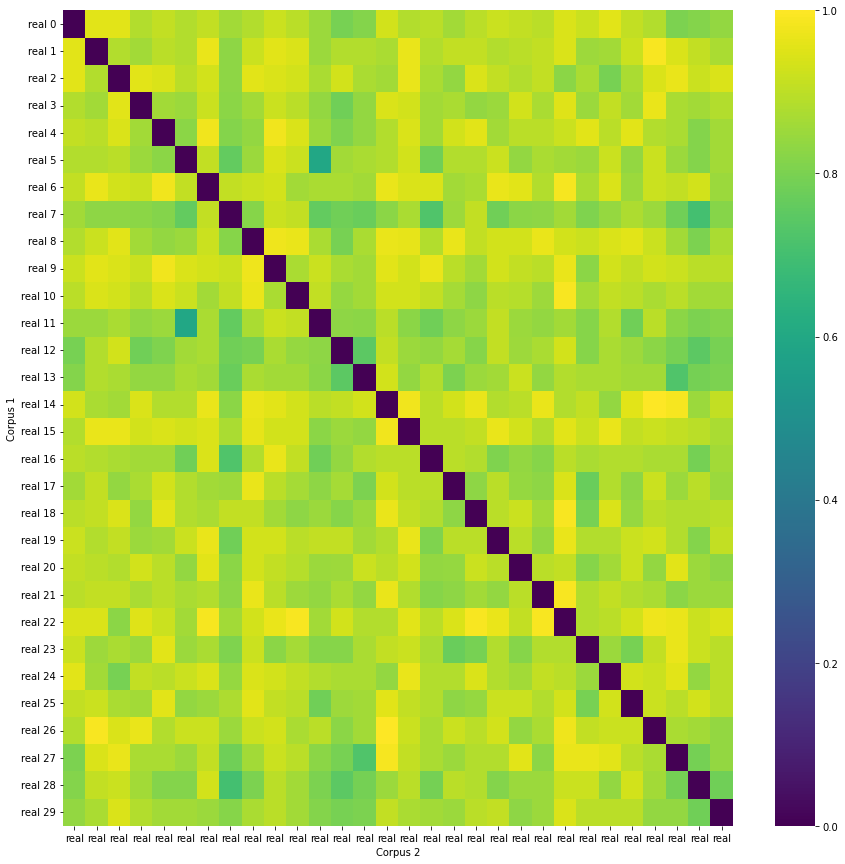

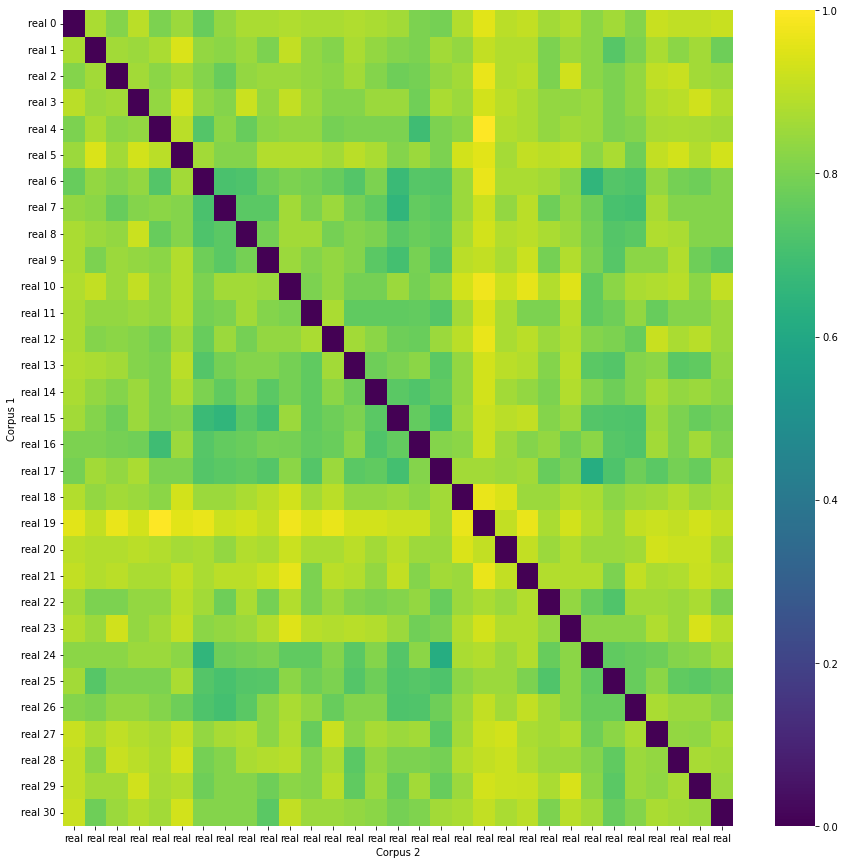

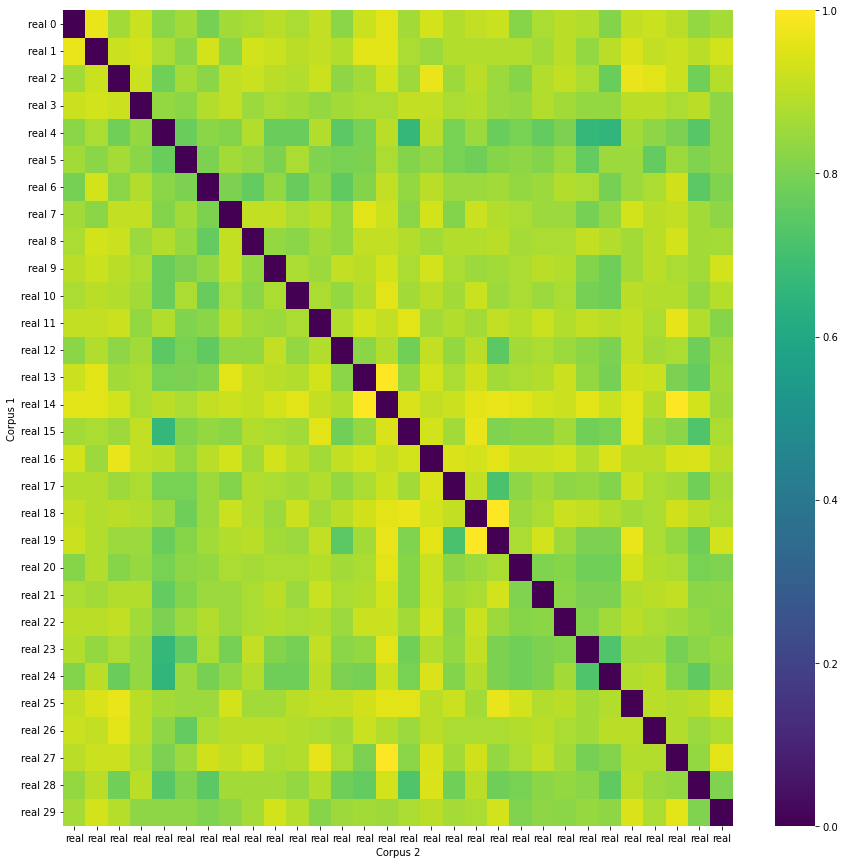

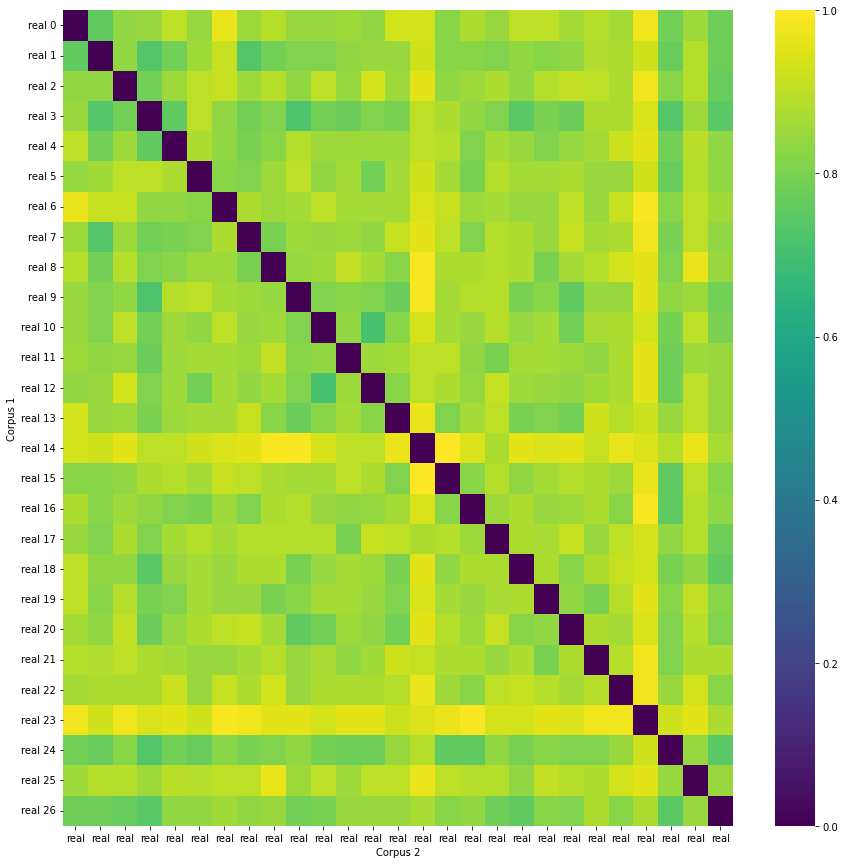

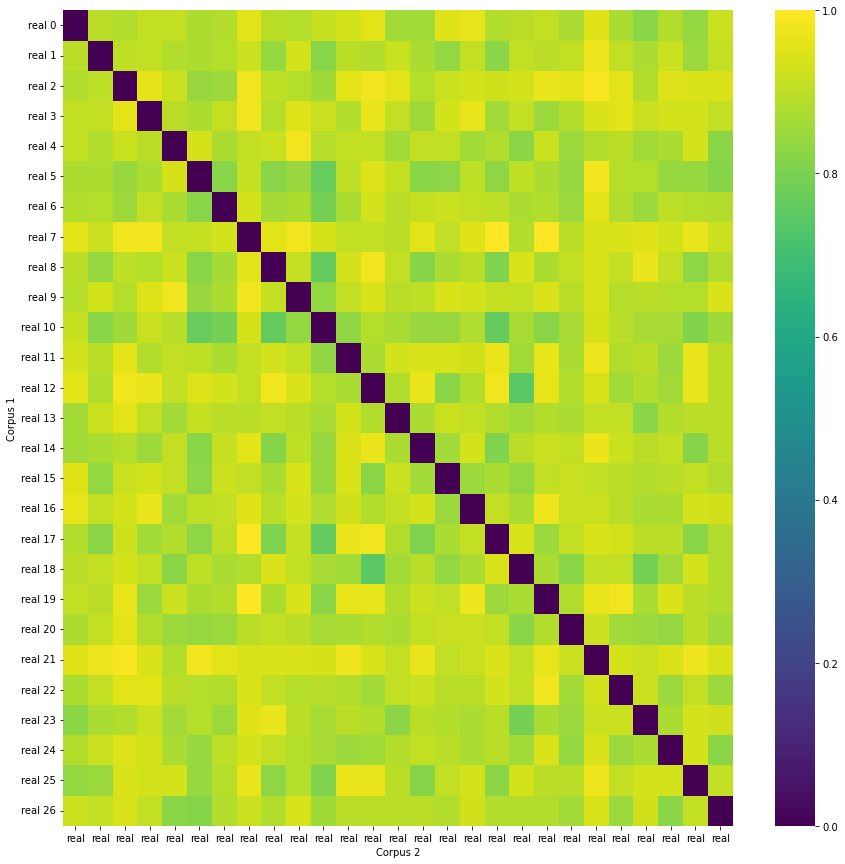

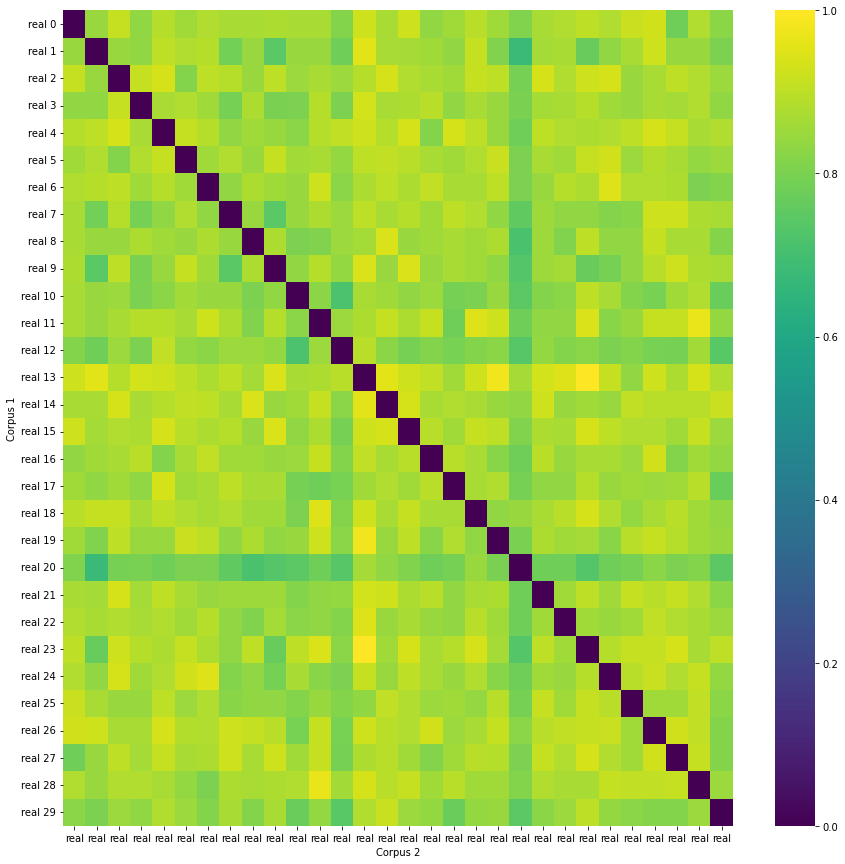

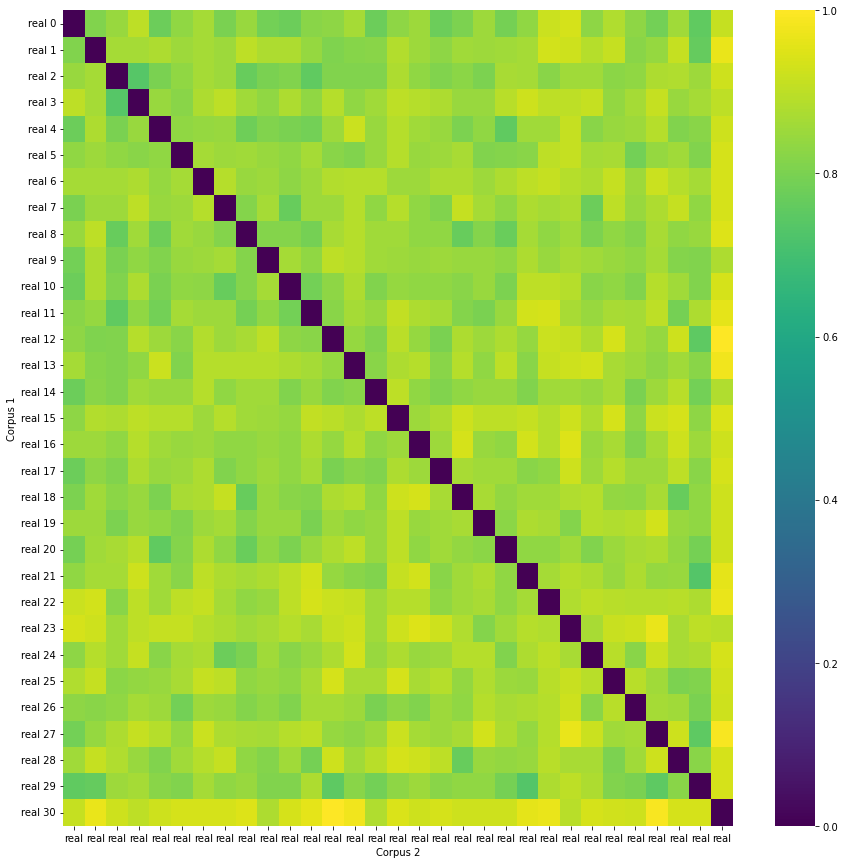

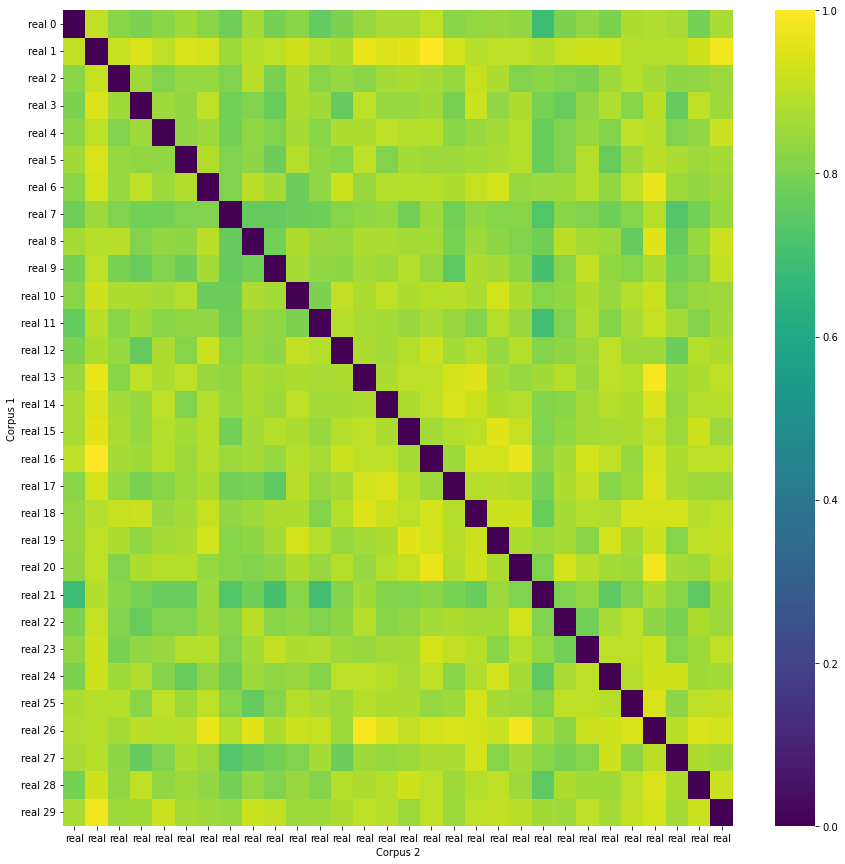

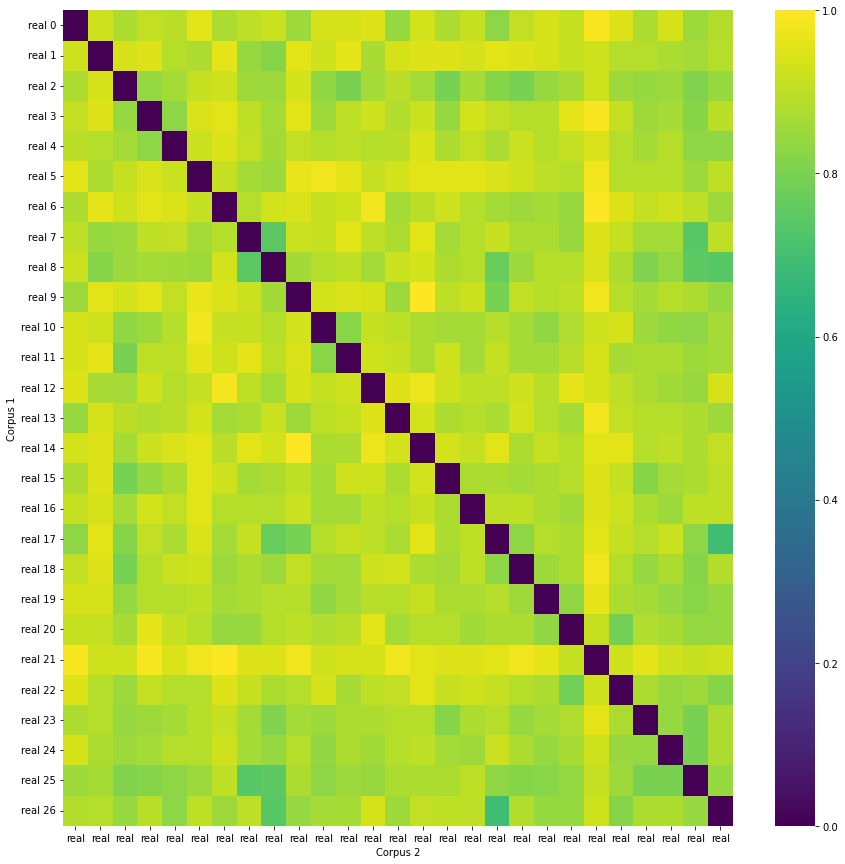

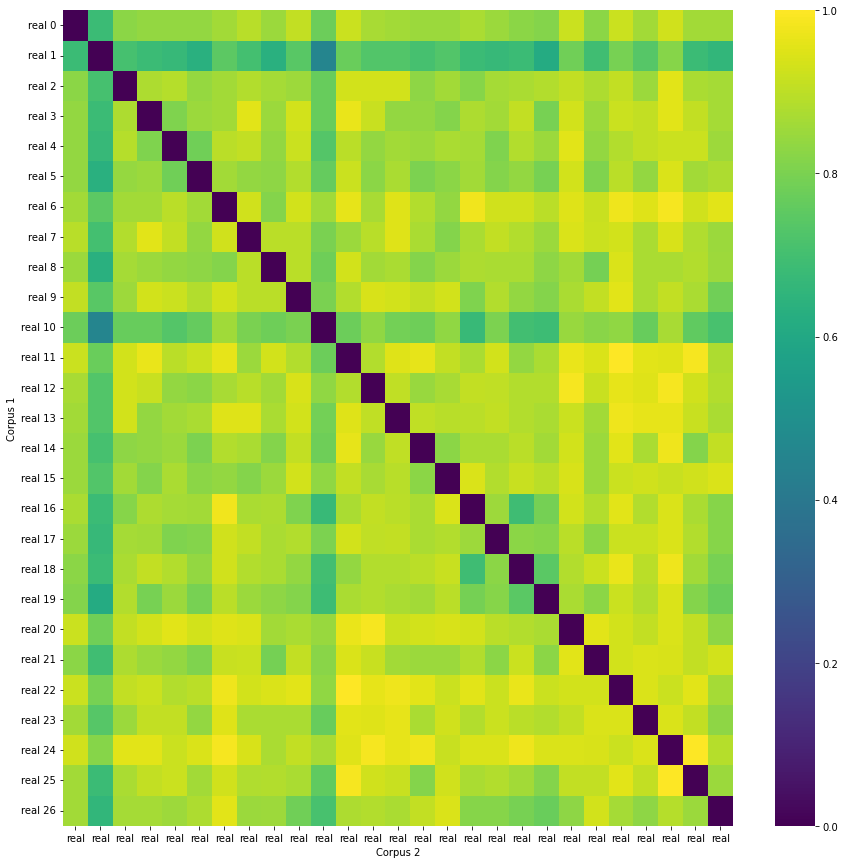

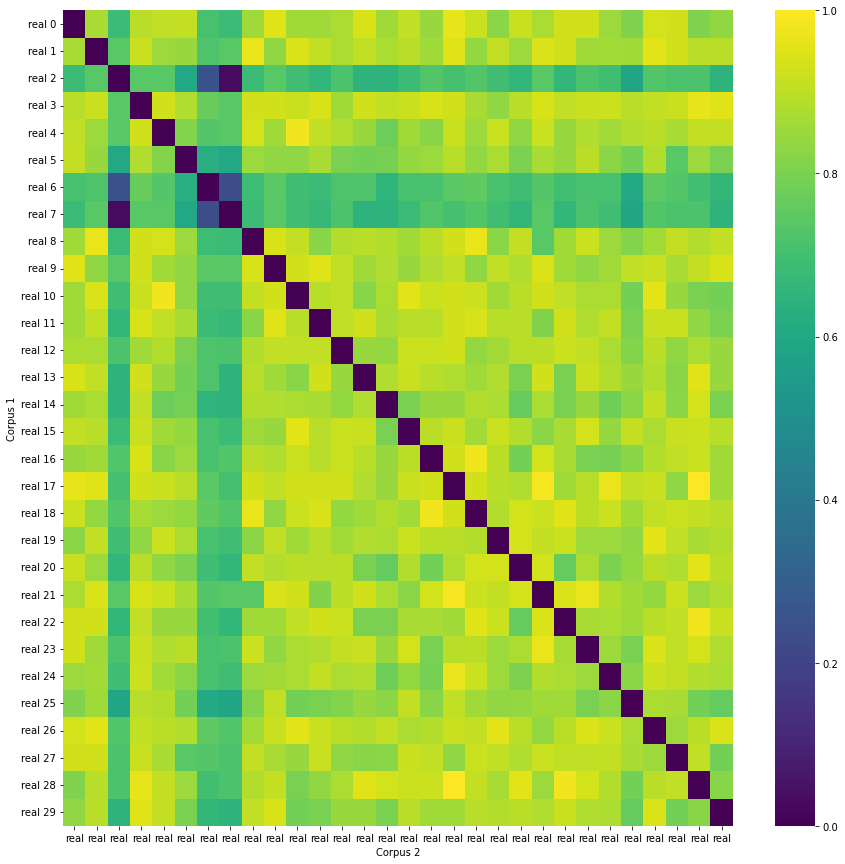

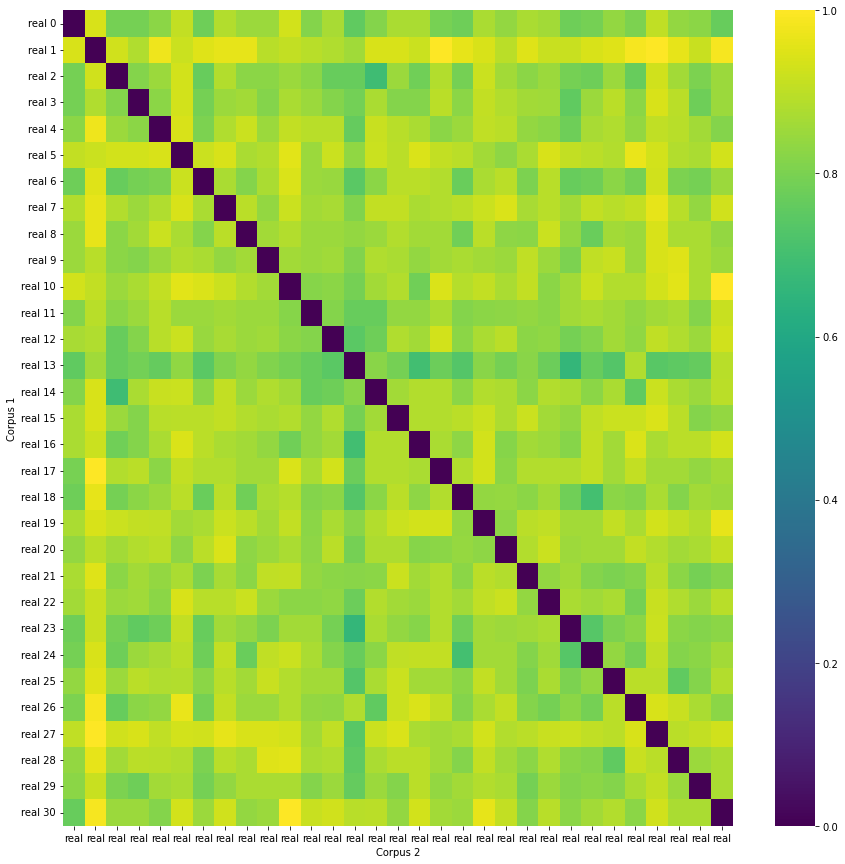

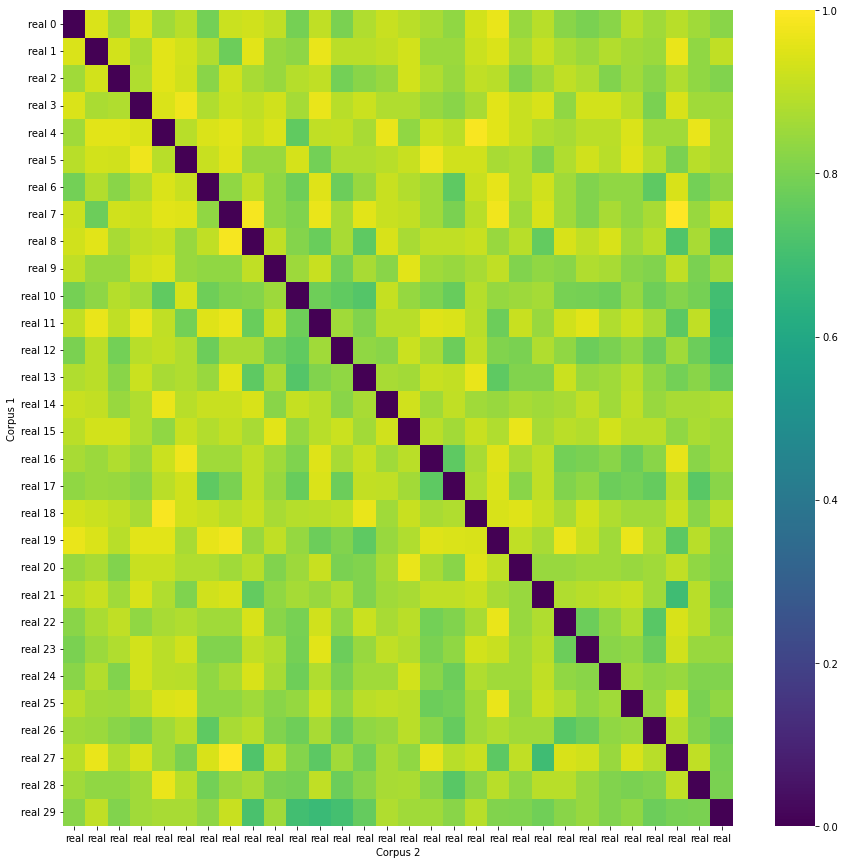

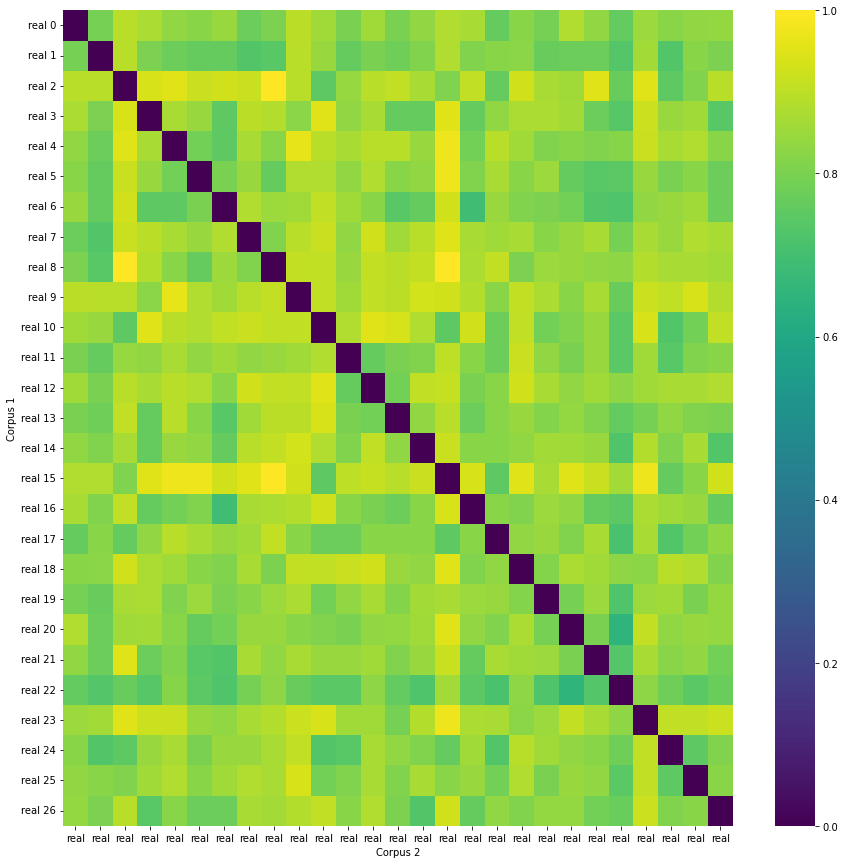

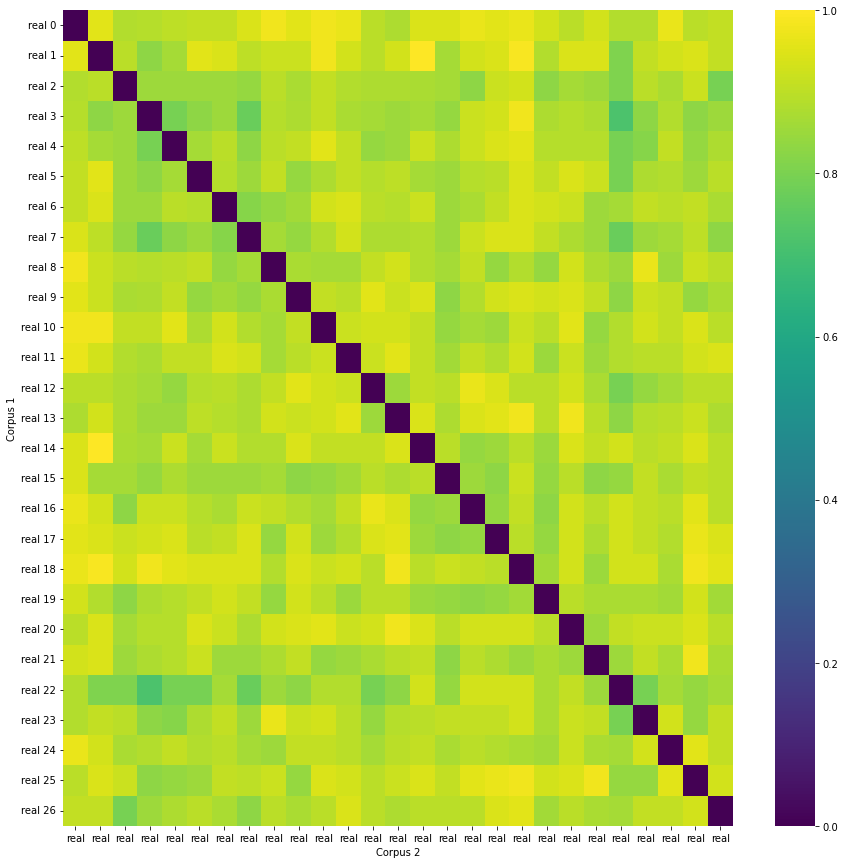

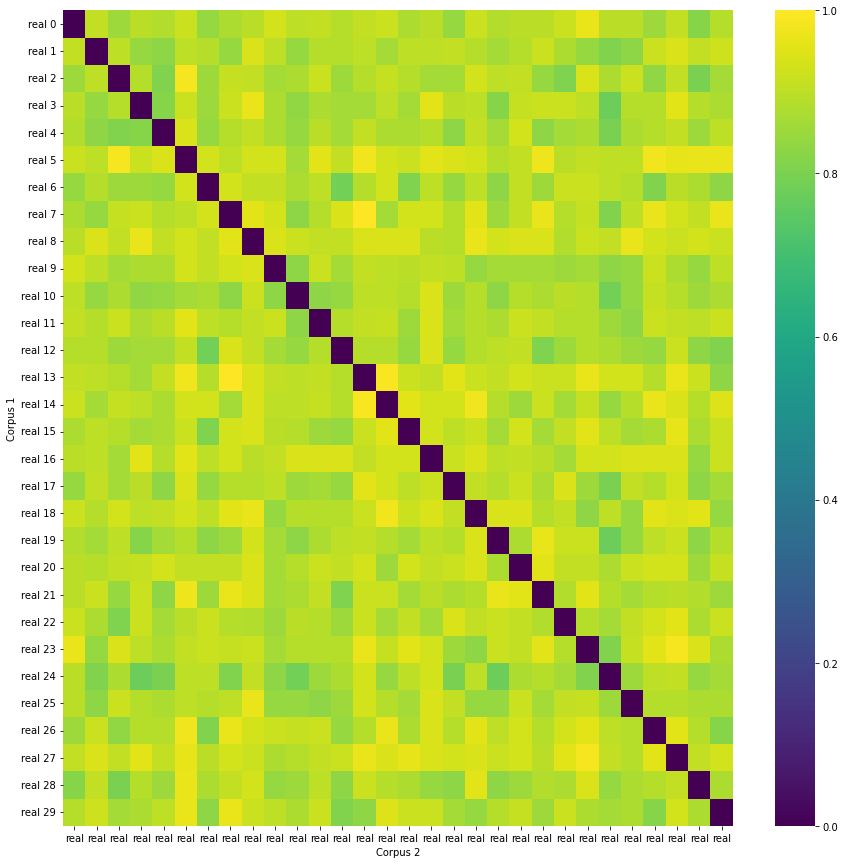

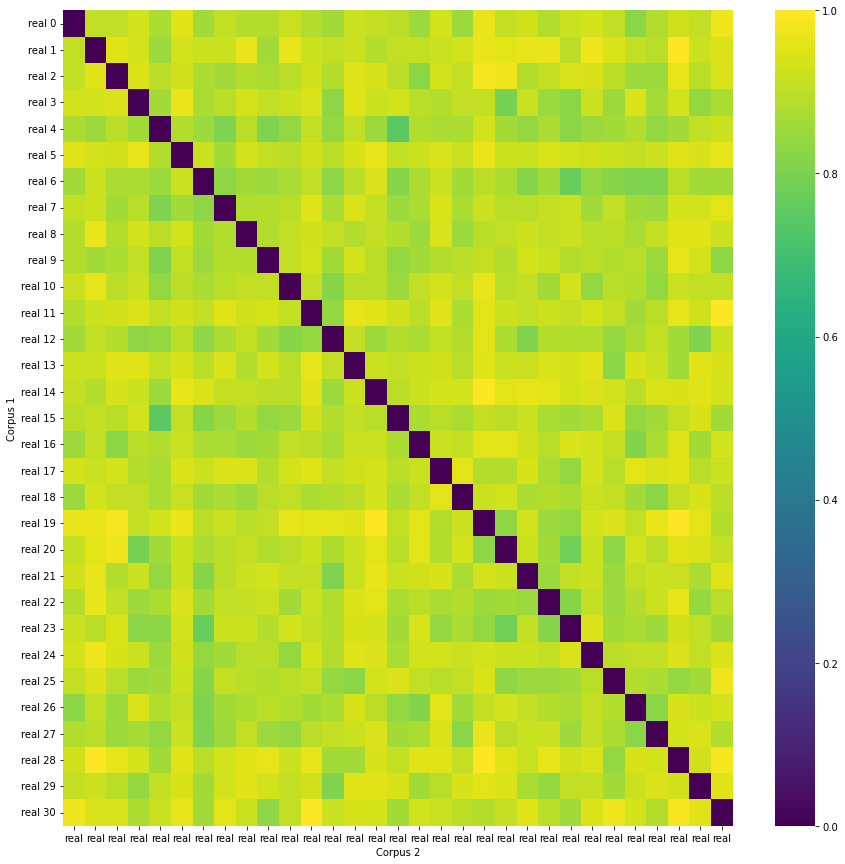

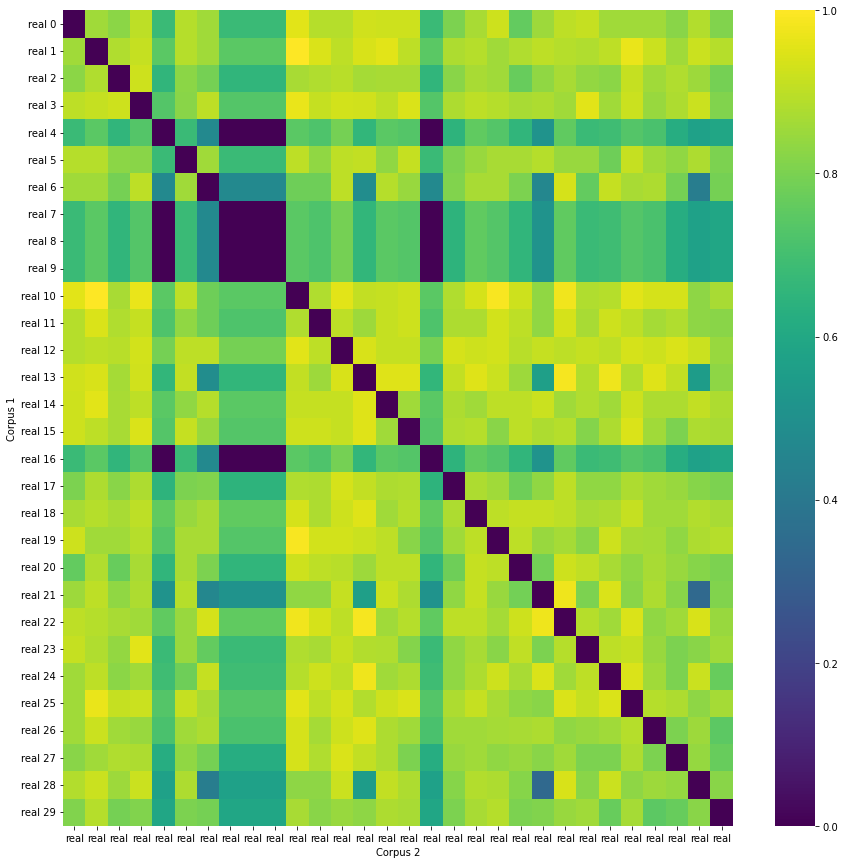

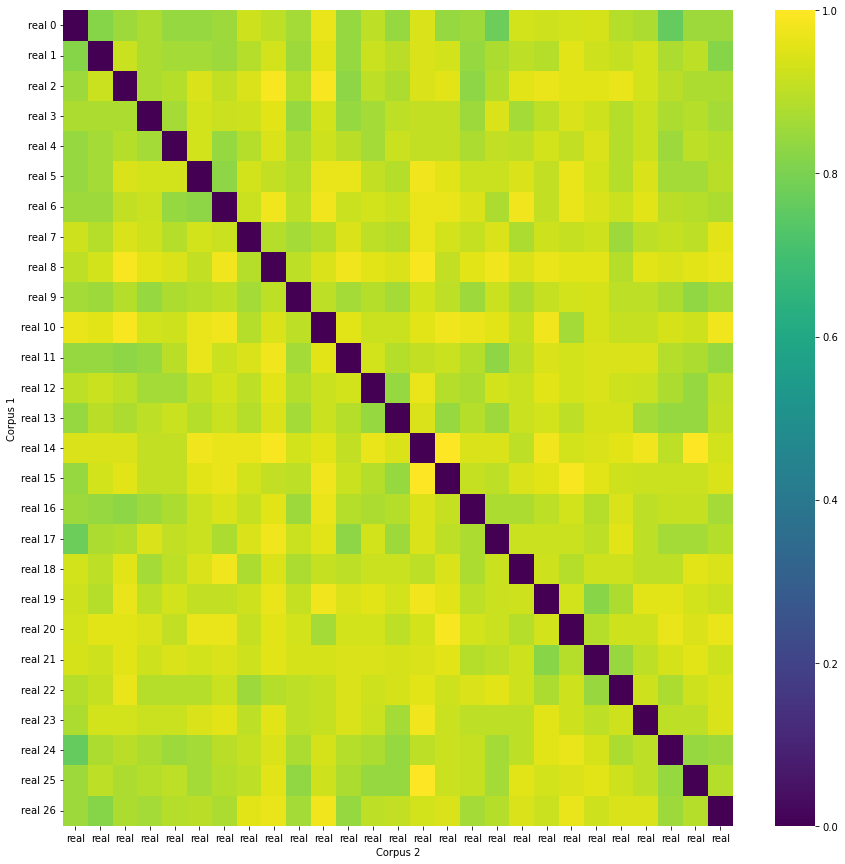

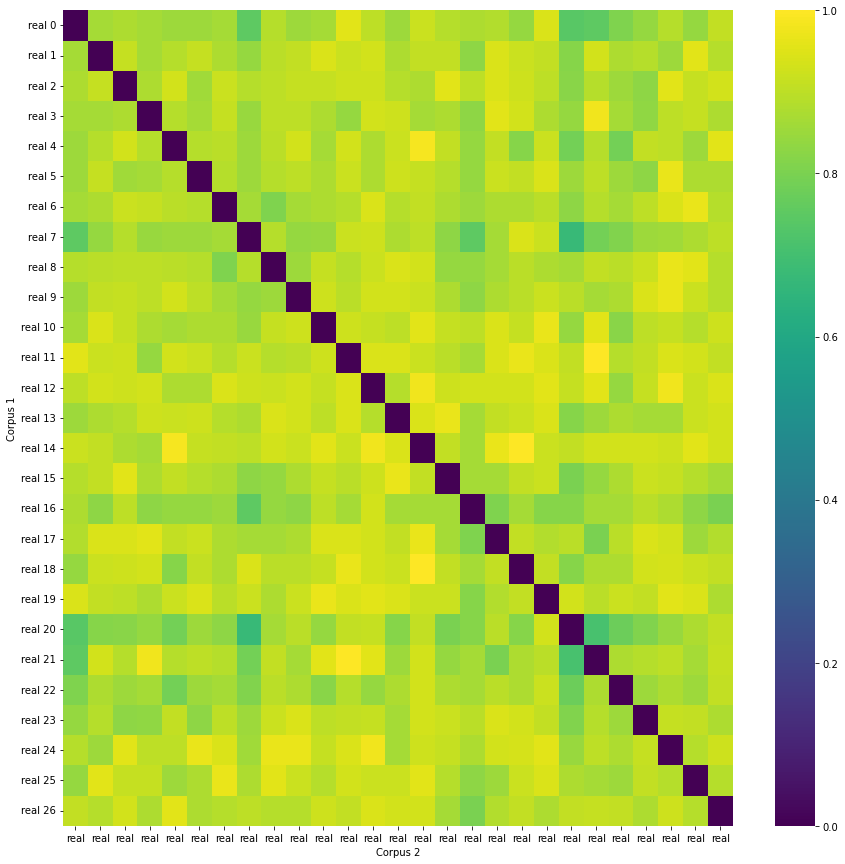

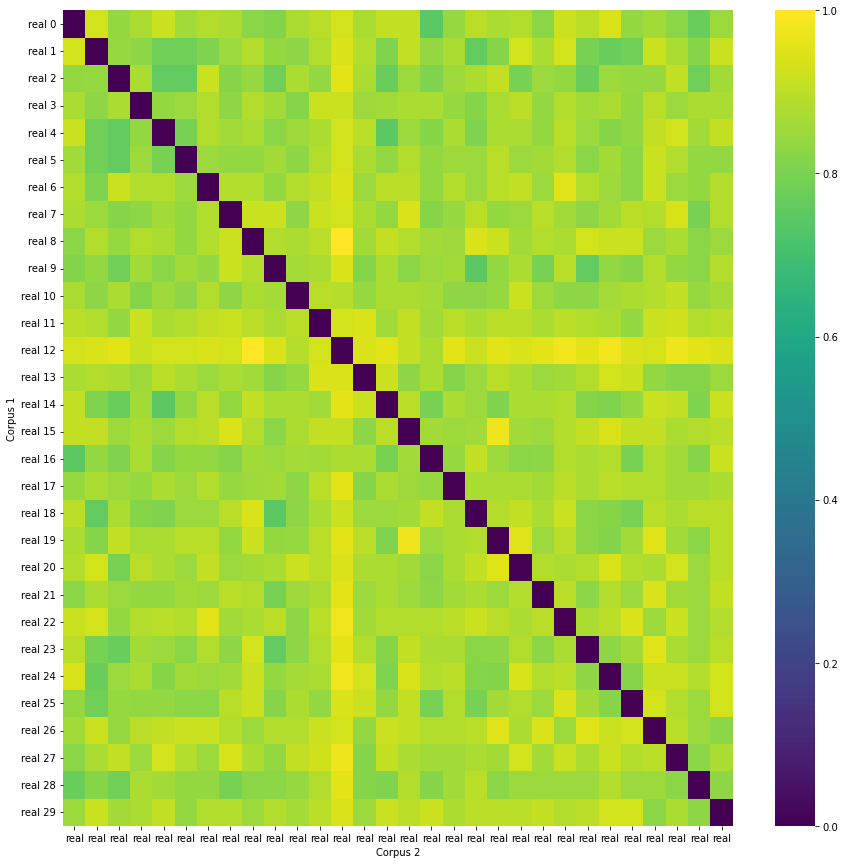

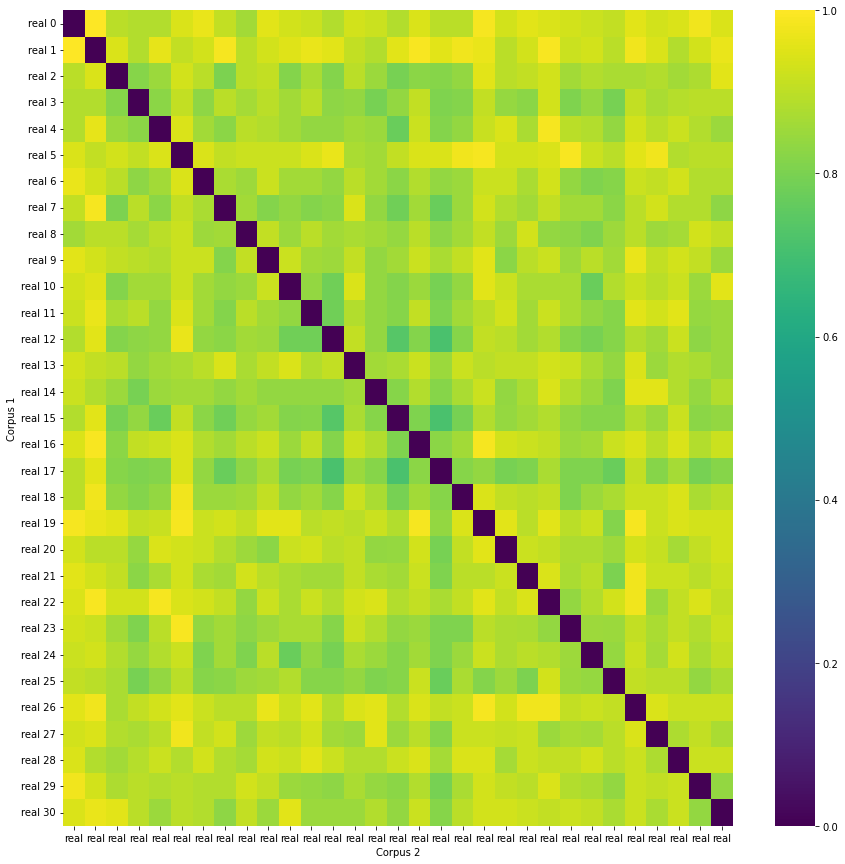

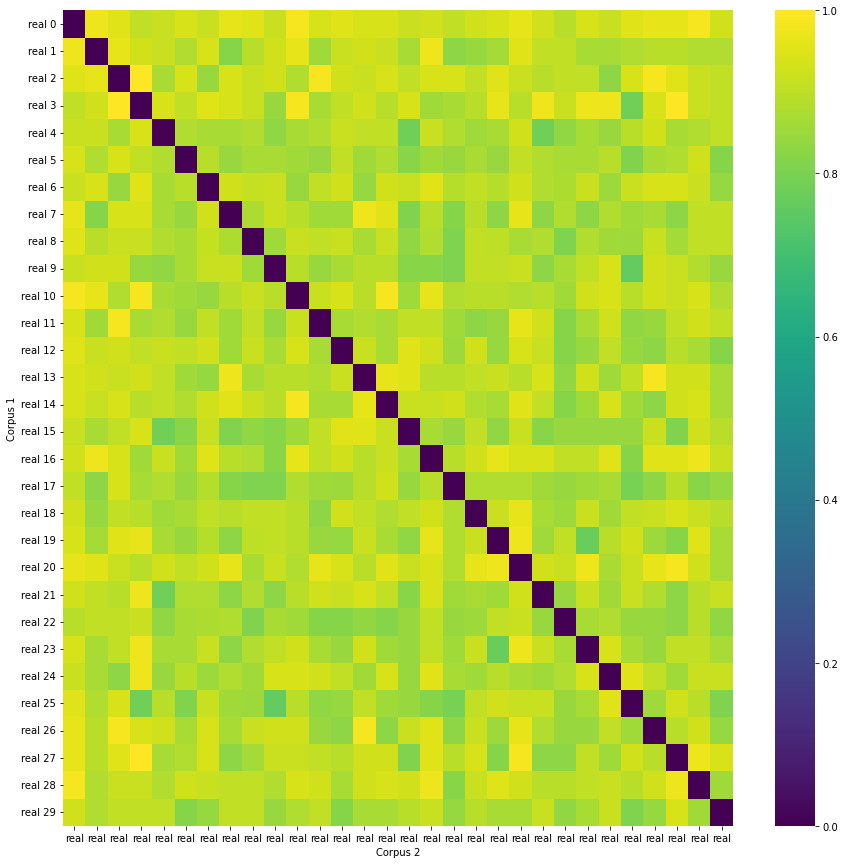

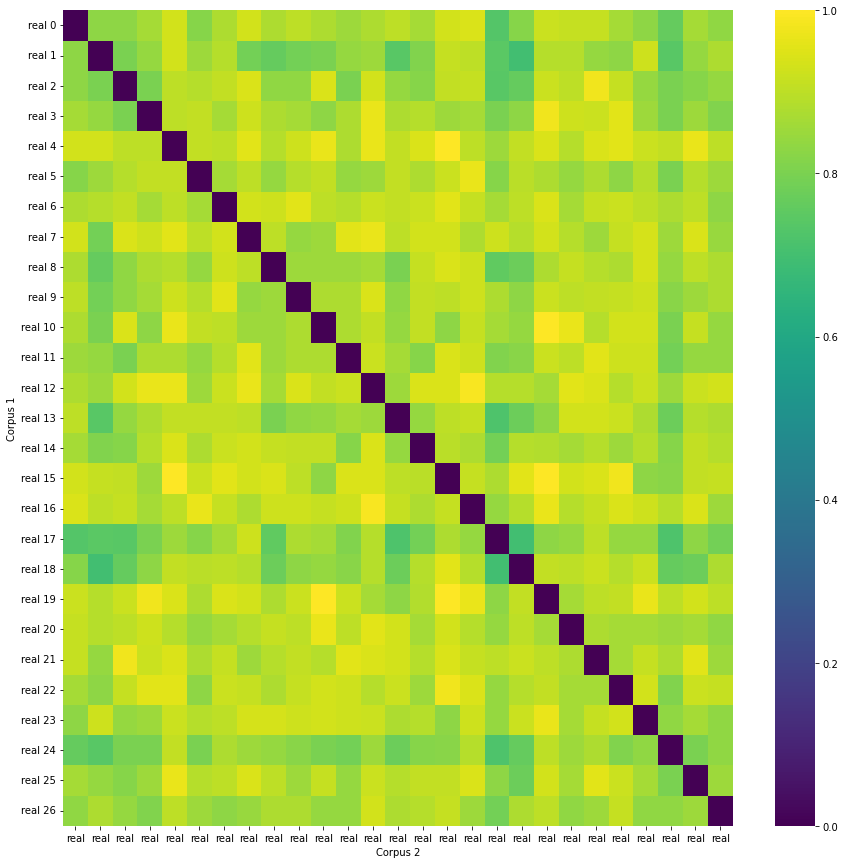

In [102]:
for folder_name in os.listdir(base_folder):
    for topic in topics:
        run_lpa(base_folder+"/"+folder_name+"/"+topic+"/"+"word_count", 
               r"C:\Users\roial\Documents\Work\LPA-for-Detection\Experiments\Each_model_DVRS_with_spd",
               folder_name+"-"+topic , to_spd = True)
